# Parser HH and NLP discription

Задания:


*   Наривсовать pie диограмму или гистограмму на основе колнки предметов. Или другими способами узнать балланс классов(число экземпляров каждого класса)
*   Посмотреть среднее количество слов колонки `Название`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from nltk.corpus import stopwords # список стопслов
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation
import json
import re
import nltk

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install nltk


In [3]:
nltk.download('all') # Подгрузка необходимых данных для работы работы nltk 
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\stavr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\stavr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\stavr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\stavr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\stavr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\s

[nltk_data]    |   Package swadesh is already up-to-date!
[nltk_data]    | Downloading package switchboard to
[nltk_data]    |     C:\Users\stavr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package switchboard is already up-to-date!
[nltk_data]    | Downloading package timit to
[nltk_data]    |     C:\Users\stavr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     C:\Users\stavr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     C:\Users\stavr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\stavr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |    

True

In [4]:
# Ссылка на скачивание файла (файл большой, загрузить напрямую GOOGLE не дает)
# https://drive.google.com/file/d/1XD-81w9FPRsY8Ir8bBtB8FM8EWgxIqKI/view?usp=sharing
    
df = pd.read_csv('all_vac_company.csv', sep=',')
df.head(3)

,_id,area,area_id,description,employer,employment,experience,industry,key_skills,name,professional_roles,salary_currency,salary_max,salary_min,schedule,specializations,vacancies_url
0,49133800,Рубцовск,1226,<strong>Обязанности:</strong> <ul> <li>Админис...,Глобал Логистик,Полная занятость,Нет опыта,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""1С: Предприятие 8""},{""name"":""1С прог...",Начинающий программист 1С,"[{""id"":""96"",""name"":""Программист, разработчик""}]",NaN,NaN,NaN,Полный день,"[{""id"":""1.221"",""name"":""Программирование, Разра...",https://hh.ru/vacancy/49133800
1,44460274,Рубцовск,1226,<strong>Обязанности:</strong> <ul> <li> <p>Обе...,Глобал Логистик,Полная занятость,От 1 года до 3 лет,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""1С: Зарплата и управление персоналом...",Программист 1С,"[{""id"":""96"",""name"":""Программист, разработчик""}]",NaN,NaN,NaN,Полный день,"[{""id"":""1.221"",""name"":""Программирование, Разра...",https://hh.ru/vacancy/44460274
2,49111123,Рубцовск,1226,<strong>Обязанности:</strong> <ul> <li>Обеспеч...,Глобал Логистик,Полная занятость,Нет опыта,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""Настройка ПК""},{""name"":""Настройка ПО...",Специалист по информационным технологиям,"[{""id"":""121"",""name"":""Специалист технической по...",NaN,NaN,NaN,Полный день,"[{""id"":""1.221"",""name"":""Программирование, Разра...",https://hh.ru/vacancy/49111123


In [5]:
df.shape

(57205, 17)

# Предобработка данных


*   Преобразуем кей. 
*   Очистим роле
* Выделим требования - условия - 


In [6]:
df_clean = df.copy()

In [7]:
df_clean.shape

(57205, 17)

In [8]:
# Создадим флаг принадлежности вакансии к IT
df_clean['_IT'] = False

In [9]:
# Из признака professional_roles (тип str) получим два признака prof_roles_id  - номер 
df_clean["_prof_roles_id"] = df_clean["professional_roles"].apply(lambda x: x[1:-1])
df_clean["_prof_roles_id"] = df_clean["_prof_roles_id"].apply(lambda x: json.loads(x.replace("'",'"')))
df_clean["_prof_roles_id"] = df_clean["_prof_roles_id"].apply(lambda x: int(x.get('id')))

In [10]:
# и prof_roles_name - название профессии
df_clean["_prof_roles_name"] = df_clean["professional_roles"].apply(lambda x: x[1:-1])
df_clean["_prof_roles_name"] = df_clean["_prof_roles_name"].apply(lambda x: json.loads(x.replace("'",'"')))
df_clean["_prof_roles_name"] = df_clean["_prof_roles_name"].apply(lambda x: x.get('name'))

In [11]:
id_label =df_clean._prof_roles_id.unique()
print(f'Итого в датасет загружено {len(id_label)} различных профессий')

Итого в датасет загружено 126 различных профессий


#### Нормализуем specializations :
- создам признак с **числовыми значениями** специализаций special_id
- создам признак с **названиями**  специализаций special_name

In [12]:
# Сделаем перебор по словарю specializations и соберем номера, запишем их в виде списка в special_id 

def get_special_id(list_special):
    id_special = [skill.get('id') for skill in list_special]
    return ' '.join(id_special)

# Заменим незаполненные значения в specializations на 'Nan'
df_clean.loc[df_clean.specializations.isna(), 'specializations'] = "Nan"

# Из признака key_skills (тип str) получим признак key_skills_list тип list 
df_clean["_special_id"] = df_clean["specializations"].apply(lambda x: eval(x))

# Применим функцию get_skill для перезаписи словаря из key_skills в строку (всезначения через пробел)
df_clean["_special_id"] = df_clean["_special_id"].apply(get_special_id)

In [13]:
# Сделаем перебор по словарю specializations и соберем номера, запишем их в виде списка в special_name

def get_special_name(list_special):
    name_special = [skill.get('name') for skill in list_special]
    return ' '.join(name_special)

# Из признака key_skills (тип str) получим признак key_skills_list тип list 
df_clean["_special_name"] = df_clean["specializations"].apply(lambda x: eval(x))

# Применим функцию get_skill для перезаписи словаря из key_skills в строку (всезначения через пробел)
df_clean["_special_name"] = df_clean["_special_name"].apply(get_special_name)

In [14]:
# Имея данные справочника hh.ru о наименованиях профессий, указанных в вакансии: https://api.hh.ru/professional_roles,
# сформируем список профессий IT, в соответствии со справичником:
it_prof_roles = [84, 11, 36, 10, 25, 34, 37, 73, 79, 96, 104, 107, 112,  113, 114, 116, 121, 124, 125, 126, 134, 40]

In [15]:
# Если вакансия имеет профессию из списка - флаг '_IT'] в True (вакансия относится к IT)

df_clean.loc[df_clean["_prof_roles_id"].isin(it_prof_roles), '_IT' ] = True
df_clean.loc[df_clean["_IT"]].shape

(40477, 22)

In [16]:
# Имея данные справочника hh.ru о специальностях профессий, указанных в вакансии: https://api.hh.ru/specializations,
# сформируем список профессий IT, в соответствии со справичником:

it_spicializ = [1.395, 1.400, 1.420, 1.474, 1.475, 1.536, 1.744, 1.3, 1.9, 1.10, 1.25, 1.30, 1.50, 1.82,
1.89, 1.110, 1.113, 1.116, 1.117, 1.137, 1.161,
1.172, 1.203, 1.211, 1.221, 1.225, 1.232, 1.246, 1.270, 1.272, 1.273, 1.274, 1.277, 1.295,
1.296, 1.327, 1.359, 12.5, 12.6, 12.92, 12.97,12.251, 14.91, 14.141,
17.625, 17.538, 17.111, 17.269, 5.27, 3.26, 3.48, 3.64, 3.90, 3.98, 3.150, 4.47, 9.94, 15.93, 25.383]

In [17]:
def get_percent_special(list_special):
    '''определение процента специализации IT в перечне, который указал работодатель в вакансии'''
    list_special = list_special.split(' ')
    count = 0
    for item in list_special:
        try: item = float(item)
        except: item = 100
        if item in it_spicializ:
            count += 1
    percent = count / len(list_special) 
    return round(percent,2)

In [18]:
# Составим новый признак, определяющий принадлежность к IT по мажоритарному признаку (если больше 60% указанных специализаций
# принадлежат IT, то относим эту вакансию к IT)
df_clean['_percent_special'] = df_clean['_special_id'].apply(lambda x: get_percent_special(x))
df_clean.loc[df_clean._percent_special > 0.6, '_IT'] = True

In [19]:
df_clean.loc[df_clean["_IT"]].shape

(45830, 23)

In [20]:
# Создали датасет, в котором содержатся вакансии, отфильтрованные по профессии или по специализации
df_it = df_clean.loc[df_clean._IT == True]
df_it.shape

(45830, 23)

## Почистим наш датасет, проверив профессии, вошедшие в фрейм:

In [21]:
# Список профессий и частота их в датафрейме df_it
df_it[['_prof_roles_id', '_prof_roles_name']].value_counts()

_prof_roles_id  _prof_roles_name                
96              Программист, разработчик            13402
40              Другое                               5362
10              Аналитик                             4883
121             Специалист технической поддержки     3748
124             Тестировщик                          2331
                                                    ...  
86              Оператор станков с ЧПУ                  1
76              Менеджер/руководитель АХО               1
41              Журналист, корреспондент                1
31              Грузчик                                 1
146             Юрист                                   1
Length: 108, dtype: int64

In [22]:
# Можно чистить (убрать не IT профессии) по признаку prof_roles_id (создал датафрейм, в котором определил индексы 
# профессий и частоту их попадания в нашем датафрейме )
df_fric_prof_role_id = df_it['_prof_roles_id'].value_counts() > 50

# (нашли индексы вакансий, номера профессий которых встречаются больше 50 раза )
# Можно чистить по признаку id_label (частота попадания номера профессии в наш датасет)
id_label = df_fric_prof_role_id[df_it['_prof_roles_id'].value_counts() > 50].index.tolist()

#  Чистим, удаляя строки с вакансиями, не вошедшими в id_label 
df_it = df_it.loc[df_it._prof_roles_id.isin(id_label)]
df_it.shape

(44910, 23)

In [23]:
df_it[['_prof_roles_id', '_prof_roles_name']].value_counts()

_prof_roles_id  _prof_roles_name                                    
96              Программист, разработчик                                13402
40              Другое                                                   5362
10              Аналитик                                                 4883
121             Специалист технической поддержки                         3748
124             Тестировщик                                              2331
113             Системный администратор                                  2103
116             Специалист по информационной безопасности                1986
107             Руководитель проектов                                    1826
104             Руководитель группы разработки                           1581
70              Менеджер по продажам, менеджер по работе с клиентами     1108
34              Дизайнер, художник                                        957
73              Менеджер продукта                                        

In [24]:
# Удалим записи, не связанняе с IT (не попавшие в список it_prof_roles) 
not_it_prof_roles = [103, 93, 49, 17, 132, 8, 106]
df_it.loc[df_it['_prof_roles_id'].isin(not_it_prof_roles), '_IT'] = False
df_it = df_it.loc[df_it._IT == True]
df_it.shape

(44244, 23)

In [25]:
#  Еще раз проверим перечень специальностей, попавших в датафрейм
df_it[['_prof_roles_id', '_prof_roles_name']].value_counts()

_prof_roles_id  _prof_roles_name                                    
96              Программист, разработчик                                13402
40              Другое                                                   5362
10              Аналитик                                                 4883
121             Специалист технической поддержки                         3748
124             Тестировщик                                              2331
113             Системный администратор                                  2103
116             Специалист по информационной безопасности                1986
107             Руководитель проектов                                    1826
104             Руководитель группы разработки                           1581
70              Менеджер по продажам, менеджер по работе с клиентами     1108
34              Дизайнер, художник                                        957
73              Менеджер продукта                                        

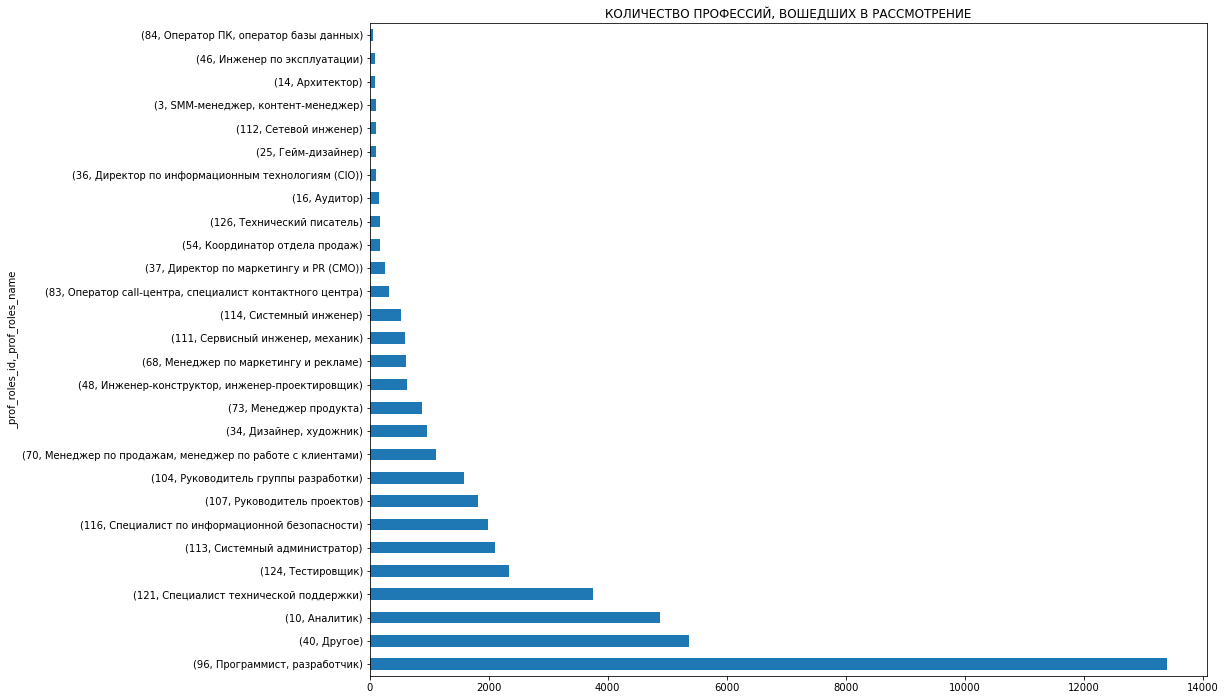

In [26]:
df_it[['_prof_roles_id', '_prof_roles_name']].value_counts().plot(kind="barh",figsize=(15, 12), title='КОЛИЧЕСТВО ПРОФЕССИЙ, ВОШЕДШИХ В РАССМОТРЕНИЕ')
plt.show()

## Почистим специальность 40

In [27]:
# Существенную долю составляет поле 40 "Другие"
# Необходимо выделить из него данные, подходящие под IT.
# Для этого проверим специализацию. Если она менее 60% - присвоим флагу IT False

In [28]:
df_it.loc[(df_it._prof_roles_id == 40)&(df_it._percent_special < 0.6),'_IT'] = False
df_it = df_it.loc[(df_it._IT == True)]
df_it.shape

(41367, 23)

In [29]:
df_it.head(4)

,_id,area,area_id,description,employer,employment,experience,industry,key_skills,name,...,salary_min,schedule,specializations,vacancies_url,_IT,_prof_roles_id,_prof_roles_name,_special_id,_special_name,_percent_special
0,49133800,Рубцовск,1226,<strong>Обязанности:</strong> <ul> <li>Админис...,Глобал Логистик,Полная занятость,Нет опыта,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""1С: Предприятие 8""},{""name"":""1С прог...",Начинающий программист 1С,...,NaN,Полный день,"[{""id"":""1.221"",""name"":""Программирование, Разра...",https://hh.ru/vacancy/49133800,True,96,"Программист, разработчик",1.221,"Программирование, Разработка",1.0
1,44460274,Рубцовск,1226,<strong>Обязанности:</strong> <ul> <li> <p>Обе...,Глобал Логистик,Полная занятость,От 1 года до 3 лет,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""1С: Зарплата и управление персоналом...",Программист 1С,...,NaN,Полный день,"[{""id"":""1.221"",""name"":""Программирование, Разра...",https://hh.ru/vacancy/44460274,True,96,"Программист, разработчик",1.221,"Программирование, Разработка",1.0
2,49111123,Рубцовск,1226,<strong>Обязанности:</strong> <ul> <li>Обеспеч...,Глобал Логистик,Полная занятость,Нет опыта,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""Настройка ПК""},{""name"":""Настройка ПО...",Специалист по информационным технологиям,...,NaN,Полный день,"[{""id"":""1.221"",""name"":""Программирование, Разра...",https://hh.ru/vacancy/49111123,True,121,Специалист технической поддержки,1.221 1.273 1.82 1.211,"Программирование, Разработка Системный админис...",1.0
4,49894148,Барнаул,11,<strong>Обязанности:</strong> <ul> <li>Работа ...,Гранат,Полная занятость,От 1 года до 3 лет,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""1С программирование""},{""name"":""1С: П...",Программист 1С8,...,NaN,Полный день,"[{""id"":""1.221"",""name"":""Программирование, Разра...",https://hh.ru/vacancy/49894148,True,96,"Программист, разработчик",1.221 1.50 1.82 1.9 1.10,"Программирование, Разработка Системы управлени...",1.0


## Построим распределение вакансий по ***РЕГИОНАМ***

In [30]:
# НА основании справочника НН получим датафрейм с регионами РФ и приджойним его к нашему датафрейму 
# для указания области, откуда была вакансия

import requests

API_AREAS_REQUEST = 'https://api.hh.ru/areas'
COUNTRY_RUSSIA = 'Россия'


def get_russian_regions():
    ''' Возвращает DataFrame регионов РФ'''
    regions = requests.get(API_AREAS_REQUEST)

    region_frame = (regions.json())
    russia_ = (region_frame[0])  # Russia

    russia_regions_list = russia_.get('areas')
    russia_regions_frame = pd.DataFrame()
    region_dict = {}

    for item_russia_regions in russia_regions_list:
        areas = []
        if item_russia_regions.get('id') == '1':
            areas.append(int('1'))
            region_dict['region_id'] = item_russia_regions.get('id')
            region_dict['region_name'] = item_russia_regions.get('name')
            region_dict['area_id'] = areas
        elif item_russia_regions.get('id') == '2':
            areas.append(int('2'))
            region_dict['region_id'] = item_russia_regions.get('id')
            region_dict['region_name'] = item_russia_regions.get('name')
            region_dict['area_id'] = areas
        else:
            region_dict['region_id'] = item_russia_regions.get('id')
            region_dict['region_name'] = item_russia_regions.get('name')

            for item_area in item_russia_regions.get('areas'):
                    areas.append(int(item_area.get('id')))
                    region_dict['area_id'] = areas

        # pd.DataFrame(region_dict)

        russia_regions_frame = pd.concat([russia_regions_frame, pd.DataFrame(region_dict)])

    return russia_regions_frame


df_region_id = pd.DataFrame(get_russian_regions())

In [31]:
df_region_id

,region_id,region_name,area_id
0,1620,Республика Марий Эл,4228
1,1620,Республика Марий Эл,1621
2,1620,Республика Марий Эл,1622
3,1620,Республика Марий Эл,4229
4,1620,Республика Марий Эл,61
...,...,...,...
105,1530,Ростовская область,4562
106,1530,Ростовская область,1552
107,1530,Ростовская область,4563
108,1530,Ростовская область,5299


In [32]:
# Внесем в ОСНОВНОЙ датафрейм df_it сведеения по региону, в котором опубликована вакансия
df_it = pd.merge(df_it, df_region_id, how='left', on='area_id')

In [33]:
df_it.shape

(41367, 25)

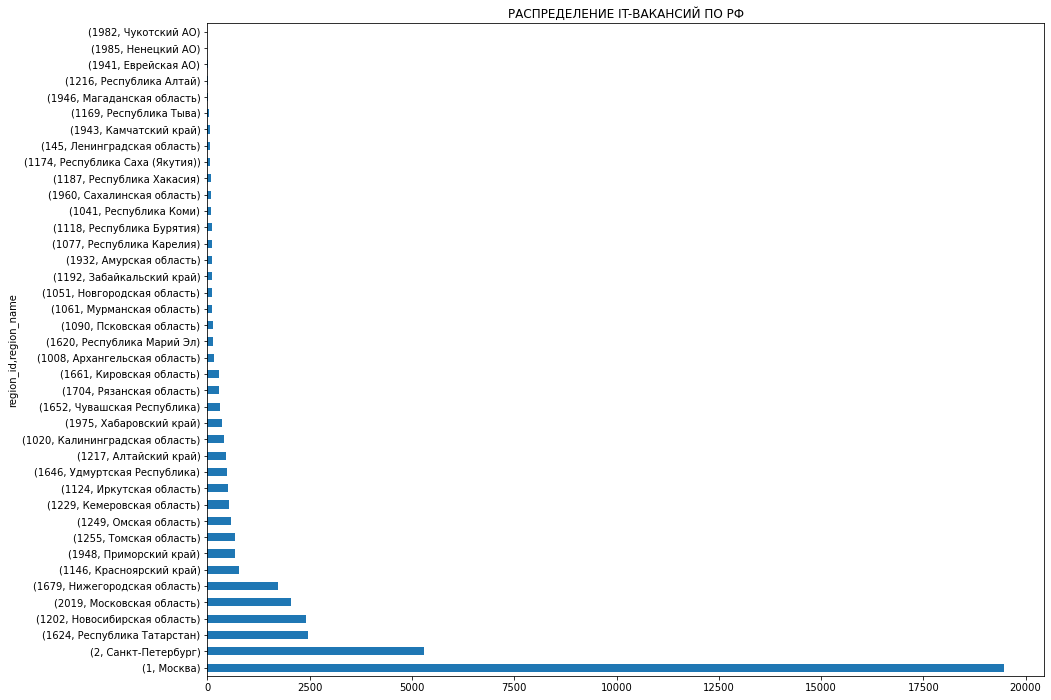

In [34]:
df_it[['region_id', 'region_name']].value_counts().plot(kind="barh", figsize=(15, 12), title='РАСПРЕДЕЛЕНИЕ IT-ВАКАНСИЙ ПО РФ')
plt.show()

## Построим распределение вакансий по ***ОТРАСЛЯМ ПРОМЫШЛЕННОСТИ***

In [35]:
df_it.loc[df_it['region_id'] == '1624', ['region_id', 'region_name']].value_counts()

region_id  region_name         
1624       Республика Татарстан    2458
dtype: int64

In [36]:
df_industry = df_it.loc[df_it.industry.notnull()].industry
# df_it.industry.notnull()


In [37]:
i = 34
print(df_industry[i])
print(type(df_industry[i]))
df_industry[i]

["Информационные технологии, системная интеграция, интернет","Электроника, приборостроение, бытовая техника, компьютеры и оргтехника"]
<class 'str'>


'["Информационные технологии, системная интеграция, интернет","Электроника, приборостроение, бытовая техника, компьютеры и оргтехника"]'

In [38]:
from collections import Counter

In [39]:
def get_industry_count(industry_parser):
    '''функция чистки списков для подсчета '''

    all_industry_list = []

    for item in industry_parser:
        # item =  '["Rerfhzv", "SSSSSSS", "DDDDDD"]'
        clear = item.replace('["','').replace(' "','').replace('",','#$')
        new_item = clear.split('"]')[:-1]
        if str(new_item).find('#$') != -1:
            new_item = str(new_item).replace("['",'').replace("']",'').replace('"','')
            new_item = new_item.split('#$')

        for i in new_item:

            all_industry_list.append(i)
    return all_industry_list


In [40]:
# df_industry_count = pd.DataFrame(dict(Counter(get_industry_count(df_industry))), columns=['industry'] )

industry_count = dict(Counter(get_industry_count(df_industry)))
industry_count
df_industry_count = pd.DataFrame([industry_count])


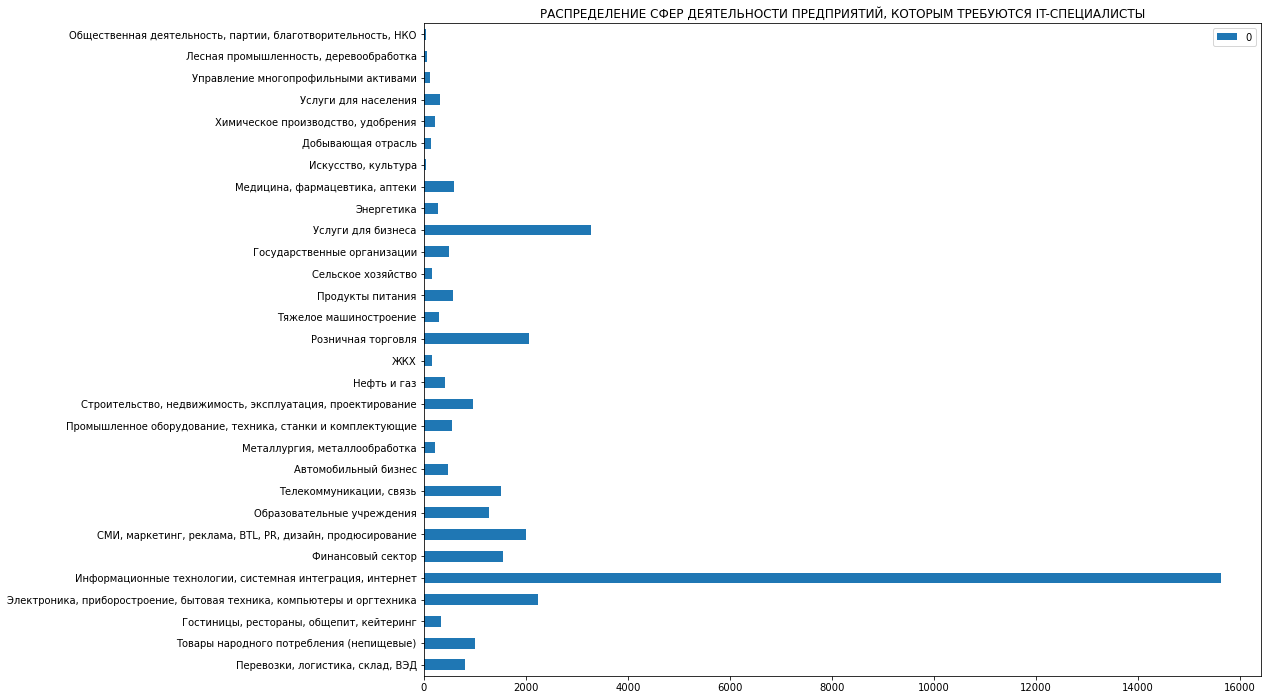

In [41]:
r = df_industry_count.T
r.sort_values(0, ascending=False)
r.plot(kind="barh", figsize=(15, 12), title='РАСПРЕДЕЛЕНИЕ СФЕР ДЕЯТЕЛЬНОСТИ ПРЕДПРИЯТИЙ, КОТОРЫМ ТРЕБУЮТСЯ IT-СПЕЦИАЛИСТЫ')
plt.show()

In [42]:
r

,0
"Перевозки, логистика, склад, ВЭД",802
Товары народного потребления (непищевые),996
"Гостиницы, рестораны, общепит, кейтеринг",328
"Электроника, приборостроение, бытовая техника, компьютеры и оргтехника",2237
"Информационные технологии, системная интеграция, интернет",15623
Финансовый сектор,1552
"СМИ, маркетинг, реклама, BTL, PR, дизайн, продюсирование",1998
Образовательные учреждения,1273
"Телекоммуникации, связь",1510
Автомобильный бизнес,474


In [43]:
df_it.shape

(41367, 25)

#### Нормализуем key_skills - преобразуем к списку

In [44]:
# Сделаем перебор по словарю key_skills_list и соберем наименования ключевых навыков, запишем их в виде списка в key_skills_list

def get_skill(list_skill):
    l_skill = [skill.get('name') for skill in list_skill]
    return ','.join(l_skill)

# Заменим незаполненные значения в key_skills на 'Nan'
df_it.loc[df_it.key_skills == '[]', 'key_skills'] = '[{"name":"Nan"}]'

# Из признака key_skills (тип str) получим признак _key_skills_list тип list 
df_it["_key_skills_list"] = df_it["key_skills"].apply(lambda x: eval(x))

# Применим функцию get_skill для перезаписи словаря из key_skills в строку (всезначения через пробел)
df_it["_key_skills_list"] = df_it["_key_skills_list"].apply(get_skill)


In [45]:
df_it.head()

,_id,area,area_id,description,employer,employment,experience,industry,key_skills,name,...,vacancies_url,_IT,_prof_roles_id,_prof_roles_name,_special_id,_special_name,_percent_special,region_id,region_name,_key_skills_list
0,49133800,Рубцовск,1226,<strong>Обязанности:</strong> <ul> <li>Админис...,Глобал Логистик,Полная занятость,Нет опыта,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""1С: Предприятие 8""},{""name"":""1С прог...",Начинающий программист 1С,...,https://hh.ru/vacancy/49133800,True,96,"Программист, разработчик",1.221,"Программирование, Разработка",1.0,1217,Алтайский край,"1С: Предприятие 8,1С программирование"
1,44460274,Рубцовск,1226,<strong>Обязанности:</strong> <ul> <li> <p>Обе...,Глобал Логистик,Полная занятость,От 1 года до 3 лет,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""1С: Зарплата и управление персоналом...",Программист 1С,...,https://hh.ru/vacancy/44460274,True,96,"Программист, разработчик",1.221,"Программирование, Разработка",1.0,1217,Алтайский край,"1С: Зарплата и управление персоналом,1С: Бухга..."
2,49111123,Рубцовск,1226,<strong>Обязанности:</strong> <ul> <li>Обеспеч...,Глобал Логистик,Полная занятость,Нет опыта,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""Настройка ПК""},{""name"":""Настройка ПО...",Специалист по информационным технологиям,...,https://hh.ru/vacancy/49111123,True,121,Специалист технической поддержки,1.221 1.273 1.82 1.211,"Программирование, Разработка Системный админис...",1.0,1217,Алтайский край,"Настройка ПК,Настройка ПО,Пользователь ПК,Сбор..."
3,49894148,Барнаул,11,<strong>Обязанности:</strong> <ul> <li>Работа ...,Гранат,Полная занятость,От 1 года до 3 лет,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""1С программирование""},{""name"":""1С: П...",Программист 1С8,...,https://hh.ru/vacancy/49894148,True,96,"Программист, разработчик",1.221 1.50 1.82 1.9 1.10,"Программирование, Разработка Системы управлени...",1.0,1217,Алтайский край,"1С программирование,1С: Предприятие 8,1С: Зарп..."
4,49873900,Барнаул,11,<p><em>Сегодня Группа «ПАРФЮМ» — это националь...,Группа компаний Парфюм,Полная занятость,От 1 года до 3 лет,"[""Перевозки, логистика, склад, ВЭД"",""Товары на...","[{""name"":""1С программирование""},{""name"":""1С: У...",Программист 1 С/Разработчик,...,https://hh.ru/vacancy/49873900,True,96,"Программист, разработчик",1.221,"Программирование, Разработка",1.0,1217,Алтайский край,"1С программирование,1С: Управление Торговлей,1..."


In [46]:
df_it.shape

(41367, 26)

#### Нормализуем description :
- создам признак с **значениями требований** специализаций description_requir
- создам признак с **значениями требований**  специализаций description_condit

In [47]:
responsib = ['обязанности','делать', 'предстоит', 'ждет', 'заниматься', 'обязан', 'задачи']
require = ['требования','ждём', 'ожидаем', 'подходите', 'требуется', 'важно:']
conditions = ['условия','предлагаем', 'получите', 'обещаем']

In [48]:
# Применим функцию get_description для вытаскивания из description ОБЯЗАН ТРЕБОВАНИЙ и УСЛОВИЙ и записи их в нов.признаки


In [49]:
def get_description_respons(s):
    '''выковыриваем из description ОБЯЗАННОСТИ  разбивку description на списки делаем split по <strong> (если <strong>`а нет - пишем 'Nan') '''
    colum_responsib = 'Nan'
    s = s.lower()    # к нижнему регистру
    s = re.sub("<p>|</p>|<ul>|<li>|</li>|</ul>|<ol>|</ol>|<br>|</br>|<br />|</em>|<em>", "", s) # почистим от лишнего HTML хлама
    if s.find('<strong>') == -1:
        colum_responsib = 'Nan'
    else:
        s_list = s.split('<strong>')
        s_list_list = [i.split('</strong>') for i in s_list] # сделаем список списков
#         colum_responsib = []
        for item in s_list_list:
            find_responsib = [item[0].find(i) for i in responsib]
            if max(find_responsib) != -1:
                try: colum_responsib = item[1]
                except: colum_responsib = 'Nan' 
    return colum_responsib

# создам новый признак responsib, в него внесу ОБЯЗАННОСТИ, вычищенные из description с помощью функции get_description_respons
df_it["_responsib"] = df_it["description"].apply(get_description_respons)


In [50]:
def get_description_require(s):
    '''выковыриваем из description требования, description на списки делаем split по <strong> (если <strong>а нет - пишем Nan)'''
    s = s.lower()    # к нижнему регистру
    s = re.sub("<p>|</p>|<ul>|<li>|</li>|</ul>|<ol>|</ol>|<br>|</br>|<br />|</em>|<em>", "", s) # почистим от лишнего HTML хлама
    colum_require = 'Nan'    
    if s.find('<strong>') == -1: 
        colum_require = 'Nan'
    else:
        s_list = s.split('<strong>')
        s_list_list = [i.split('</strong>') for i in s_list]

        for item in s_list_list:
            find_require = [item[0].find(i) for i in require]
            if max(find_require) != -1:
                try:  colum_require = item[1]
                except: colum_require = 'Nan' 
        
    return colum_require

# создам новый признак require, в него внесу требования, вычищенные из description с помощью функции get_description_require
df_it["_require"] = df_it["description"].apply(get_description_require)

In [51]:
def get_description_conditions(s):
#     выковыриваем из description УСЛОВИЯ,
#     разбивку description на списки делаем split по <strong> (если <strong>`а нет - пишем 'Nan') '''
    s = s.lower()    # к нижнему регистру
    s = re.sub("<p>|</p>|<ul>|<li>|</li>|</ul>|<ol>|</ol>|<br>|<br />|</em>|<em>", "", s) # почистим от лишнего HTML хлама
    colum_condit = 'Nan'   
    if s.find('<strong>') == -1: 
        colum_condit = 'Nan'
    else:
        s_list = s.split('<strong>')
        s_list_list = [i.split('</strong>') for i in s_list]

        for item in s_list_list:
            find_condit = [item[0].find(i) for i in conditions]
            if max(find_condit) != -1:
                try:  colum_condit = item[1]
                except: colum_condit = 'Nan' 
        
    return colum_condit

# создам новый признак require, в него внесу требования, вычищенные из description с помощью функции get_description_require
df_it["_conditions"] = df_it["description"].apply(get_description_conditions)


In [52]:
df_it.shape

(41367, 29)

# Для ТОП-10 id-профессии найдем самые востребованные требования

*

In [53]:
#  Еще раз проверим перечень специальностей, попавших в датафрейм
df_it[['_prof_roles_id', '_prof_roles_name']].value_counts()

_prof_roles_id  _prof_roles_name                                    
96              Программист, разработчик                                13402
10              Аналитик                                                 4883
121             Специалист технической поддержки                         3748
40              Другое                                                   2485
124             Тестировщик                                              2331
113             Системный администратор                                  2103
116             Специалист по информационной безопасности                1986
107             Руководитель проектов                                    1826
104             Руководитель группы разработки                           1581
70              Менеджер по продажам, менеджер по работе с клиентами     1108
34              Дизайнер, художник                                        957
73              Менеджер продукта                                        

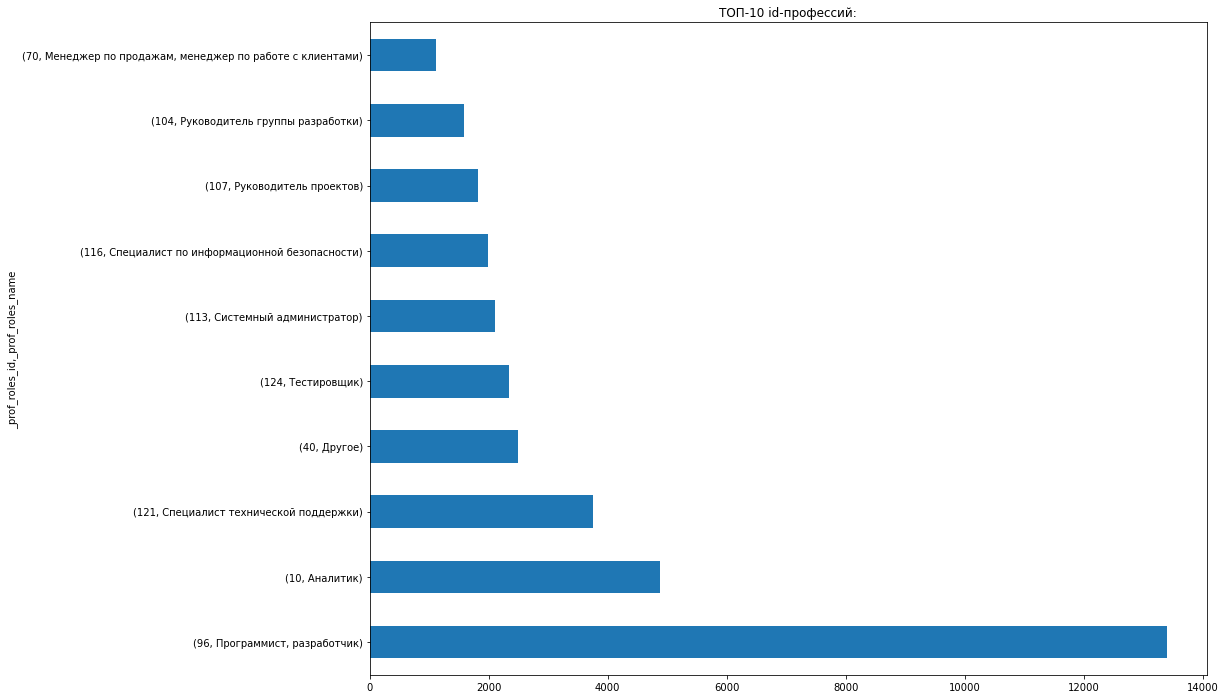

In [54]:
# ТОП-9 id-профессий:
id_top_10 = [96, 10, 121, 40, 124, 113, 116, 107, 104, 70]
df_it.loc[df_it._prof_roles_id.isin(id_top_10), ['_prof_roles_id', '_prof_roles_name']].value_counts().plot(kind="barh",
                                                                                                            figsize=(15, 12),
                                                                                                            title='ТОП-10 id-профессий:')
plt.show()

In [55]:
def get_all_skill(list_skill):
    ''' соберем все скилы в один список'''
    all_skill = []
    for i in skill_list_all: 
        all_skill = all_skill + i.split(',')
    return all_skill

In [59]:
id_top_9 = [96, 10, 121, 40, 124, 113, 116, 107, 104]

In [60]:
# def get_skill_top_9(id_top_9):
#     '''получим таблицу навыков для профессии'''
#     skill_list = []
#     df_skil_id = pd.DataFrame()
    
#     df_skil_id = df_it.loc[(df_it._prof_roles_id == id_top_9)]
#     skill_list = df_skil_id._key_skills_list.to_list()
#     skill_list_all = []
#     skill_list_all = [i for i in skill_list]

#     df_skill = pd.DataFrame(get_all_skill(skill_list_all), columns=['skill'])
#     count = int(df_skill.count())
#     df_proff = pd.DataFrame((round((df_skill.value_counts().head(10)) / count * 100)), columns=['count %'])
#     df_proff
    
#     return df_proff

In [61]:
# get_skill_top_9(104)

In [72]:
# # отбираем по номеру id-профессии '_prof_roles_id'
id_top_9 = [96, 10, 121, 40, 124, 113, 116, 107, 104]
df_skil_id = df_it.loc[(df_it._prof_roles_id == 10)]
skill_list = df_skil_id._key_skills_list.to_list()
skill_list_all = []
skill_list_all = [i for i in skill_list]

df_skill_96 = pd.DataFrame(get_all_skill(skill_list_all), columns=['skill'])
count = int(df_skill_96.count())
df_proff_96 = pd.DataFrame((round((df_skill_96.value_counts().head(10)) / count * 100)), columns=['Аналитик'])
df_proff_96

,Аналитик
skill,
SQL,7.0
Python,3.0
Nan,3.0
Аналитическое мышление,2.0
Бизнес-анализ,2.0
BPMN,2.0
Английский язык,2.0
UML,2.0
MS PowerPoint,2.0


In [73]:
# # отбираем по номеру id-профессии '_prof_roles_id'
id_top_9 = [96, 10, 121, 40, 124, 113, 116, 107, 104]
df_skil_id = df_it.loc[(df_it._prof_roles_id == 10)]
skill_list = df_skil_id._key_skills_list.to_list()
skill_list_all = []
skill_list_all = [i for i in skill_list]

df_skill_10 = pd.DataFrame(get_all_skill(skill_list_all), columns=['skill'])
count = int(df_skill_10.count())
df_proff_10 = pd.DataFrame((round((df_skill_10.value_counts().head(10)) / count * 100)), columns=['Аналитик'])
df_proff_10

,Аналитик
skill,
SQL,7.0
Python,3.0
Nan,3.0
Аналитическое мышление,2.0
Бизнес-анализ,2.0
BPMN,2.0
Английский язык,2.0
UML,2.0
MS PowerPoint,2.0


In [74]:
# # отбираем по номеру id-профессии '_prof_roles_id'
# id_top_9 = [96, 10, 121]
df_skil_id = df_it.loc[(df_it._prof_roles_id == 96)|(df_it._prof_roles_id == 10)|(df_it._prof_roles_id == 121)]
skill_list = df_skil_id._key_skills_list.to_list()
skill_list_all = []
skill_list_all = [i for i in skill_list]

df_skill = pd.DataFrame(get_all_skill(skill_list_all), columns=['skill'])
count = int(df_skill.count())
df_proff = pd.DataFrame((round((df_skill.value_counts().head(10)) / count * 100)), columns=['Программист, Аналитик, Специалист технической поддержки'])
df_proff

,"Программист, Аналитик, Специалист технической поддержки"
skill,
Nan,4.0
SQL,4.0
Git,3.0
JavaScript,2.0
Python,2.0
Английский язык,2.0
PostgreSQL,1.0
Linux,1.0
Java,1.0


In [75]:
# # отбираем по номеру id-профессии '_prof_roles_id'
id_top_9 = [96, 10, 121, 40, 124, 113, 116, 107, 104]
df_skil_id = df_it.loc[(df_it._prof_roles_id == 40)]
skill_list = df_skil_id._key_skills_list.to_list()
skill_list_all = []
skill_list_all = [i for i in skill_list]

df_skill_40 = pd.DataFrame(get_all_skill(skill_list_all), columns=['skill'])
count = int(df_skill_40.count())
df_proff_40 = pd.DataFrame((round((df_skill_40.value_counts().head(10)) / count * 100)), columns=['40 Другое'])
df_proff_40

,40 Другое
skill,
Nan,25.0
Работа в команде,5.0
Грамотная речь,4.0
Грамотность,3.0
Работа с большим объемом информации,3.0
Пользователь ПК,2.0
Деловое общение,2.0
Деловая переписка,1.0
Высокая скорость печати,1.0


In [76]:
# # отбираем по номеру id-профессии '_prof_roles_id'
id_top_9 = [96, 10, 121, 40, 124, 113, 116, 107, 104]
df_skil_id = df_it.loc[(df_it._prof_roles_id == 124)]
skill_list = df_skil_id._key_skills_list.to_list()
skill_list_all = []
skill_list_all = [i for i in skill_list]

df_skill_124 = pd.DataFrame(get_all_skill(skill_list_all), columns=['skill'])
count = int(df_skill_124.count())
df_proff_124 = pd.DataFrame((round((df_skill_124.value_counts().head(10)) / count * 100)), columns=['124 Тестировщик'])
df_proff_124

,124 Тестировщик
skill,
SQL,7.0
Тестирование,6.0
Функциональное тестирование,5.0
Atlassian Jira,4.0
Git,4.0
Nan,4.0
Python,3.0
QA,3.0
Java,3.0


In [77]:
# # отбираем по номеру id-профессии '_prof_roles_id'
id_top_9 = [96, 10, 121, 40, 124, 113, 116, 107, 104]
df_skil_id = df_it.loc[(df_it._prof_roles_id == 113)]
skill_list = df_skil_id._key_skills_list.to_list()
skill_list_all = []
skill_list_all = [i for i in skill_list]

df_skill_113 = pd.DataFrame(get_all_skill(skill_list_all), columns=['skill'])
count = int(df_skill_113.count())
df_proff_113 = pd.DataFrame((round((df_skill_113.value_counts().head(10)) / count * 100)), columns=['Системный администратор'])
df_proff_113

,Системный администратор
skill,
Linux,5.0
Nan,5.0
Active Directory,2.0
Администрирование серверов Windows,2.0
Администрирование сетевого оборудования,2.0
Настройка ПК,2.0
Настройка сетевых подключений,2.0
Windows 7,2.0
TCP/IP,2.0


In [78]:
# # отбираем по номеру id-профессии '_prof_roles_id'
id_top_9 = [96, 10, 121, 40, 124, 113, 116, 107, 104]
df_skil_id = df_it.loc[(df_it._prof_roles_id == 116)]
skill_list = df_skil_id._key_skills_list.to_list()
skill_list_all = []
skill_list_all = [i for i in skill_list]

df_skill_116 = pd.DataFrame(get_all_skill(skill_list_all), columns=['skill'])
count = int(df_skill_116.count())
df_proff_116 = pd.DataFrame((round((df_skill_116.value_counts().head(10)) / count * 100)), columns=['116 Специалист по информационной безопасности                '])
df_proff_116

,116 Специалист по информационной безопасности
skill,
Nan,4.0
Linux,3.0
Информационная безопасность,3.0
Информационные технологии,3.0
Английский язык,2.0
SQL,2.0
Техническая поддержка,1.0
TCP/IP,1.0
Cisco,1.0


In [79]:
# # отбираем по номеру id-профессии '_prof_roles_id'
id_top_9 = [96, 10, 121, 40, 124, 113, 116, 107, 104]
df_skil_id = df_it.loc[(df_it._prof_roles_id == 107)]
skill_list = df_skil_id._key_skills_list.to_list()
skill_list_all = []
skill_list_all = [i for i in skill_list]

df_skill_107 = pd.DataFrame(get_all_skill(skill_list_all), columns=['skill'])
count = int(df_skill_107.count())
df_proff_107 = pd.DataFrame((round((df_skill_107.value_counts().head(10)) / count * 100)), columns=['Руководитель проектов'])
df_proff_107

,Руководитель проектов
skill,
Управление проектами,7.0
Работа в команде,4.0
Английский язык,3.0
Деловая коммуникация,2.0
Nan,2.0
Ведение переговоров,2.0
Организаторские навыки,2.0
Agile Project Management,2.0
MS PowerPoint,2.0


In [80]:
# # отбираем по номеру id-профессии '_prof_roles_id'
id_top_9 = [96, 10, 121, 40, 124, 113, 116, 107, 104]
df_skil_id = df_it.loc[(df_it._prof_roles_id == 121)]
skill_list = df_skil_id._key_skills_list.to_list()
skill_list_all = []
skill_list_all = [i for i in skill_list]

df_skill_121 = pd.DataFrame(get_all_skill(skill_list_all), columns=['skill'])
count = int(df_skill_121.count())
df_proff_121 = pd.DataFrame((round((df_skill_121.value_counts().head(10)) / count * 100)), columns=['Руководитель группы разработки'])
df_proff_121

,Руководитель группы разработки
skill,
Nan,12.0
Техническая поддержка,3.0
Грамотная речь,3.0
Грамотность,3.0
Работа в команде,3.0
Настройка ПК,2.0
Пользователь ПК,2.0
Helpdesk,2.0
Английский язык,2.0


In [81]:
# # отбираем по номеру id-профессии '_prof_roles_id'
id_top_9 = [96, 10, 121, 40, 124, 113, 116, 107, 104]
df_skil_id = df_it.loc[(df_it._prof_roles_id == 104)]
skill_list = df_skil_id._key_skills_list.to_list()
skill_list_all = []
skill_list_all = [i for i in skill_list]

df_skill_104 = pd.DataFrame(get_all_skill(skill_list_all), columns=['skill'])
count = int(df_skill_104.count())
df_proff_104 = pd.DataFrame((round((df_skill_104.value_counts().head(10)) / count * 100)), columns=['Руководитель группы разработки'])
df_proff_104

,Руководитель группы разработки
skill,
Управление проектами,6.0
Nan,4.0
SQL,2.0
Английский язык,2.0
Работа в команде,1.0
Организаторские навыки,1.0
Деловая коммуникация,1.0
Atlassian Jira,1.0
MS Project,1.0


# ВИЗУАЛИЗАЦИЯ

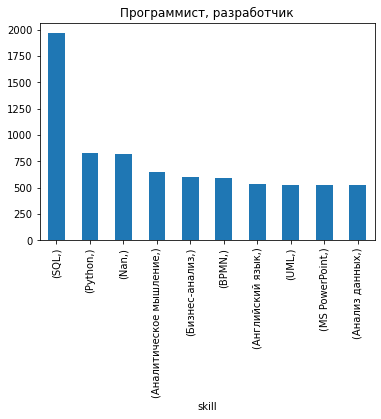

In [82]:
df_skill_96.value_counts().head(10).plot(kind="bar", title = 'Программист, разработчик')
# df_skill_10.value_counts().head(10).plot(kind="bar", title = 'Аналитик')
# df_skill_121.value_counts().head(10).plot(kind="bar", title = 'Специалист технической поддержки')
# df_skill_40.value_counts().head(10).plot(kind="bar", title = 'Другое')
# df_skill_124.value_counts().head(10).plot(kind="bar", title = 'Тестировщик')
# df_skill_113.value_counts().head(10).plot(kind="bar", title = 'Системный администратор')
# df_skill_116.value_counts().head(10).plot(kind="bar", title = 'Специалист по информационной безопасности')
# df_skill_104.value_counts().head(12).plot(kind="bar", title = 'Руководитель проектов')
# df_skill_107.value_counts().head(12).plot(kind="bar", title = 'Руководитель группы разработки')

plt.show()

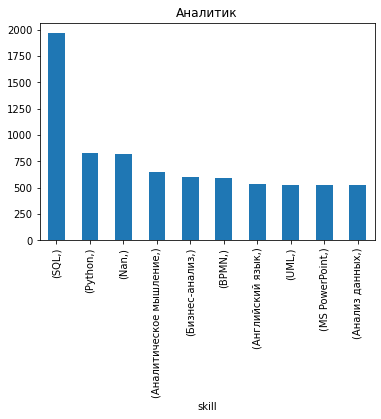

In [83]:
# df_skill_96.value_counts().head(10).plot(kind="bar", title = 'Программист, разработчик')
df_skill_10.value_counts().head(10).plot(kind="bar", title = 'Аналитик')
# df_skill_121.value_counts().head(10).plot(kind="bar", title = 'Специалист технической поддержки')
# df_skill_40.value_counts().head(10).plot(kind="bar", title = 'Другое')
# df_skill_124.value_counts().head(10).plot(kind="bar", title = 'Тестировщик')
# df_skill_113.value_counts().head(10).plot(kind="bar", title = 'Системный администратор')
# df_skill_116.value_counts().head(10).plot(kind="bar", title = 'Специалист по информационной безопасности')
# df_skill_104.value_counts().head(12).plot(kind="bar", title = 'Руководитель проектов')
# df_skill_107.value_counts().head(12).plot(kind="bar", title = 'Руководитель группы разработки')

plt.show()

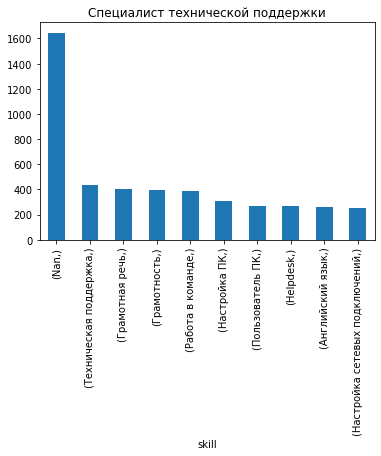

In [84]:
# df_skill_96.value_counts().head(10).plot(kind="bar", title = 'Программист, разработчик')
# df_skill_10.value_counts().head(10).plot(kind="bar", title = 'Аналитик')
df_skill_121.value_counts().head(10).plot(kind="bar", title = 'Специалист технической поддержки')
# df_skill_40.value_counts().head(10).plot(kind="bar", title = 'Другое')
# df_skill_124.value_counts().head(10).plot(kind="bar", title = 'Тестировщик')
# df_skill_113.value_counts().head(10).plot(kind="bar", title = 'Системный администратор')
# df_skill_116.value_counts().head(10).plot(kind="bar", title = 'Специалист по информационной безопасности')
# df_skill_104.value_counts().head(12).plot(kind="bar", title = 'Руководитель проектов')
# df_skill_107.value_counts().head(12).plot(kind="bar", title = 'Руководитель группы разработки')

plt.show()

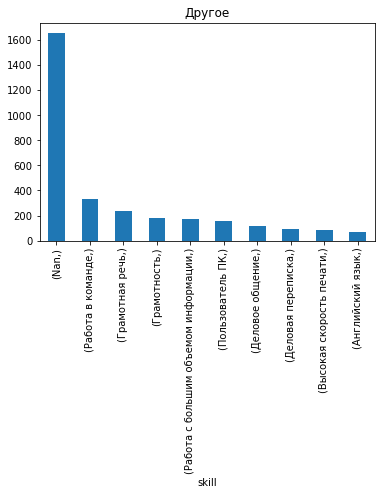

In [85]:
# df_skill_96.value_counts().head(10).plot(kind="bar", title = 'Программист, разработчик')
# df_skill_10.value_counts().head(10).plot(kind="bar", title = 'Аналитик')
# df_skill_121.value_counts().head(10).plot(kind="bar", title = 'Специалист технической поддержки')
df_skill_40.value_counts().head(10).plot(kind="bar", title = 'Другое')
# df_skill_124.value_counts().head(10).plot(kind="bar", title = 'Тестировщик')
# df_skill_113.value_counts().head(10).plot(kind="bar", title = 'Системный администратор')
# df_skill_116.value_counts().head(10).plot(kind="bar", title = 'Специалист по информационной безопасности')
# df_skill_104.value_counts().head(12).plot(kind="bar", title = 'Руководитель проектов')
# df_skill_107.value_counts().head(12).plot(kind="bar", title = 'Руководитель группы разработки')

plt.show()

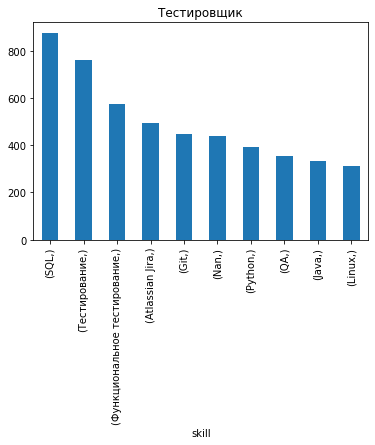

In [86]:
# df_skill_96.value_counts().head(10).plot(kind="bar", title = 'Программист, разработчик')
# df_skill_10.value_counts().head(10).plot(kind="bar", title = 'Аналитик')
# df_skill_121.value_counts().head(10).plot(kind="bar", title = 'Специалист технической поддержки')
# df_skill_40.value_counts().head(10).plot(kind="bar", title = 'Другое')
df_skill_124.value_counts().head(10).plot(kind="bar", title = 'Тестировщик')
# df_skill_113.value_counts().head(10).plot(kind="bar", title = 'Системный администратор')
# df_skill_116.value_counts().head(10).plot(kind="bar", title = 'Специалист по информационной безопасности')
# df_skill_104.value_counts().head(12).plot(kind="bar", title = 'Руководитель проектов')
# df_skill_107.value_counts().head(12).plot(kind="bar", title = 'Руководитель группы разработки')

plt.show()

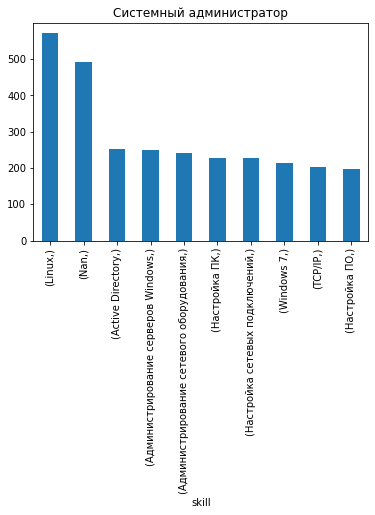

In [87]:
# df_skill_96.value_counts().head(10).plot(kind="bar", title = 'Программист, разработчик')
# df_skill_10.value_counts().head(10).plot(kind="bar", title = 'Аналитик')
# df_skill_121.value_counts().head(10).plot(kind="bar", title = 'Специалист технической поддержки')
# df_skill_40.value_counts().head(10).plot(kind="bar", title = 'Другое')
# df_skill_124.value_counts().head(10).plot(kind="bar", title = 'Тестировщик')
df_skill_113.value_counts().head(10).plot(kind="bar", title = 'Системный администратор')
# df_skill_116.value_counts().head(10).plot(kind="bar", title = 'Специалист по информационной безопасности')
# df_skill_104.value_counts().head(12).plot(kind="bar", title = 'Руководитель проектов')
# df_skill_107.value_counts().head(12).plot(kind="bar", title = 'Руководитель группы разработки')

plt.show()

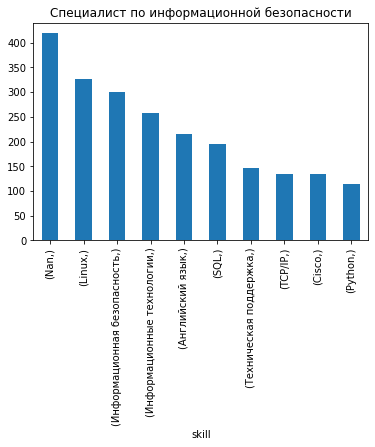

In [88]:
# df_skill_96.value_counts().head(10).plot(kind="bar", title = 'Программист, разработчик')
# df_skill_10.value_counts().head(10).plot(kind="bar", title = 'Аналитик')
# df_skill_121.value_counts().head(10).plot(kind="bar", title = 'Специалист технической поддержки')
# df_skill_40.value_counts().head(10).plot(kind="bar", title = 'Другое')
# df_skill_124.value_counts().head(10).plot(kind="bar", title = 'Тестировщик')
# df_skill_113.value_counts().head(10).plot(kind="bar", title = 'Системный администратор')
df_skill_116.value_counts().head(10).plot(kind="bar", title = 'Специалист по информационной безопасности')
# df_skill_104.value_counts().head(12).plot(kind="bar", title = 'Руководитель проектов')
# df_skill_107.value_counts().head(12).plot(kind="bar", title = 'Руководитель группы разработки')

plt.show()

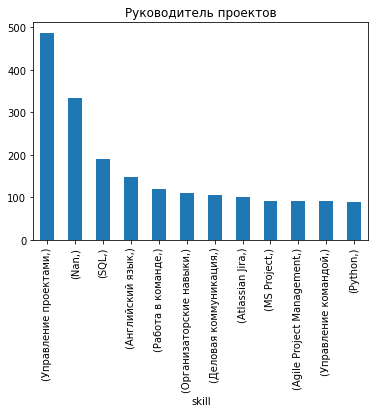

In [89]:
# df_skill_96.value_counts().head(10).plot(kind="bar", title = 'Программист, разработчик')
# df_skill_10.value_counts().head(10).plot(kind="bar", title = 'Аналитик')
# df_skill_121.value_counts().head(10).plot(kind="bar", title = 'Специалист технической поддержки')
# df_skill_40.value_counts().head(10).plot(kind="bar", title = 'Другое')
# df_skill_124.value_counts().head(10).plot(kind="bar", title = 'Тестировщик')
# df_skill_113.value_counts().head(10).plot(kind="bar", title = 'Системный администратор')
# df_skill_116.value_counts().head(10).plot(kind="bar", title = 'Специалист по информационной безопасности')
df_skill_104.value_counts().head(12).plot(kind="bar", title = 'Руководитель проектов')
# df_skill_107.value_counts().head(12).plot(kind="bar", title = 'Руководитель группы разработки')

plt.show()

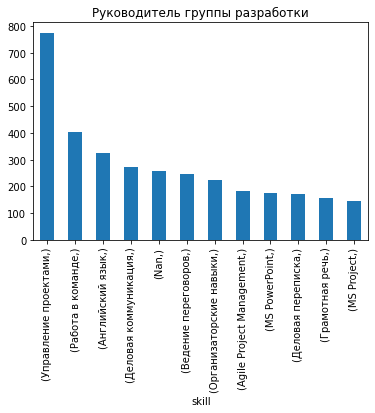

In [90]:
# df_skill_96.value_counts().head(10).plot(kind="bar", title = 'Программист, разработчик')
# df_skill_10.value_counts().head(10).plot(kind="bar", title = 'Аналитик')
# df_skill_121.value_counts().head(10).plot(kind="bar", title = 'Специалист технической поддержки')
# df_skill_40.value_counts().head(10).plot(kind="bar", title = 'Другое')
# df_skill_124.value_counts().head(10).plot(kind="bar", title = 'Тестировщик')
# df_skill_113.value_counts().head(10).plot(kind="bar", title = 'Системный администратор')
# df_skill_116.value_counts().head(10).plot(kind="bar", title = 'Специалист по информационной безопасности')
# df_skill_104.value_counts().head(12).plot(kind="bar", title = 'Руководитель проектов')
df_skill_107.value_counts().head(12).plot(kind="bar", title = 'Руководитель группы разработки')

plt.show()

# Для общего пула IT-профессий найдем ТРЕБОВАНИЯ

*    от работодателя

In [91]:
df_it.shape

(41367, 29)

In [92]:
# отбираем по номеру id-профессии '_prof_roles_id' и опыту 'experience'
df_require_txt = df_it.copy()
print(df_require_txt.shape)

(41367, 29)


In [93]:
#  ВОСПОЛЬЗУЕМСЯ ТЕМАТИЧЕСКИМ МОДЕЛИРОВАНИЕМ для вычисления наиболее часто встречающихся требований работодателя (в вакансиях)
# Необходимые импорты и подгрузки
import pandas as pd # Библиотека для работы с таблицами
import nltk # Библиотека для работы с текстами
from nltk.tokenize import word_tokenize, sent_tokenize # токенайзер - разбивает непрерывный текст на токены(слова)
from nltk.stem.snowball import SnowballStemmer # стеммер - преобразует тексты к начальной форме
from nltk.corpus import stopwords # список незначимых слов - я, ты, он, она, там и тд

import pymorphy2
from pymorphy2 import MorphAnalyzer

import string
morph_analyzer = pymorphy2.MorphAnalyzer() # Создаем объект стеммера
ru_stop_words = stopwords.words('russian')  # Подгружаем список стоп слов из модуля stopwords библиотеки nltk 
ru_stop_words = ru_stop_words + ['готовность', 'работать', 'час', 'неделя', '40', '30']

punctuations = list(string.punctuation)
punctuations.extend(['•', '—', '–', '«', '»', "'", '``', '“', '”', '.', '’', '·', '●'])


# готовность работать 40

In [94]:
def text_processing(text, morph_analyzer, stop_words, punct):
    """принимает на вход предложение и возвращает леммы токенов предложения, фильтруя по стоп словам и удаляя знаки пунктуации"""
    words = word_tokenize(text.lower()) # С помощью токенизации разбиваем текст на токены 
    words = [word for word in words if word not in stop_words] # Удаляем стопслова
    words = [word for word in words if word not in punct] # Удаляем знаки пунктуации
    words = [morph_analyzer.parse(word)[0].normalized.word for word in words] # лемматизируем каждое слово
    words = ' '.join(words)

    return words

# генерируем колонку lemmatized_text
df_require_txt['require_lemmatized'] = df_require_txt['_require'].apply(lambda x: text_processing(x, morph_analyzer, ru_stop_words, punctuations)) # с помощью метода apply прогоняем значения колонки text через нашу функцию обработки text_processing
df_require_txt.head()

,_id,area,area_id,description,employer,employment,experience,industry,key_skills,name,...,_special_id,_special_name,_percent_special,region_id,region_name,_key_skills_list,_responsib,_require,_conditions,require_lemmatized
0,49133800,Рубцовск,1226,<strong>Обязанности:</strong> <ul> <li>Админис...,Глобал Логистик,Полная занятость,Нет опыта,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""1С: Предприятие 8""},{""name"":""1С прог...",Начинающий программист 1С,...,1.221,"Программирование, Разработка",1.0,1217,Алтайский край,"1С: Предприятие 8,1С программирование",администрирование пользовательских учетных з...,профильное образование (высшее или незаконче...,официальное трудоустройство и белая заработ...,профильный образование высокий незаконченный в...
1,44460274,Рубцовск,1226,<strong>Обязанности:</strong> <ul> <li> <p>Обе...,Глобал Логистик,Полная занятость,От 1 года до 3 лет,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""1С: Зарплата и управление персоналом...",Программист 1С,...,1.221,"Программирование, Разработка",1.0,1217,Алтайский край,"1С: Зарплата и управление персоналом,1С: Бухга...",обеспечение необходимой поддержки пользоват...,опыт программирования 1с: предприятие от 2-...,заработная плата без задержек. удобный офис ...,опыт программирование 1с предприятие 2-й год х...
2,49111123,Рубцовск,1226,<strong>Обязанности:</strong> <ul> <li>Обеспеч...,Глобал Логистик,Полная занятость,Нет опыта,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""Настройка ПК""},{""name"":""Настройка ПО...",Специалист по информационным технологиям,...,1.221 1.273 1.82 1.211,"Программирование, Разработка Системный админис...",1.0,1217,Алтайский край,"Настройка ПК,Настройка ПО,Пользователь ПК,Сбор...",обеспечение бесперебойной работы компьютерно...,профильное образование (высшее или незаконче...,официальное трудоустройство и белая заработ...,профильный образование высокий незаконченный в...
3,49894148,Барнаул,11,<strong>Обязанности:</strong> <ul> <li>Работа ...,Гранат,Полная занятость,От 1 года до 3 лет,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""1С программирование""},{""name"":""1С: П...",Программист 1С8,...,1.221 1.50 1.82 1.9 1.10,"Программирование, Разработка Системы управлени...",1.0,1217,Алтайский край,"1С программирование,1С: Предприятие 8,1С: Зарп...",работа по техническим заданиям; разработка н...,: практический опыт работы в должности програ...,рабочей день 5/2 с 08.00 до 17.00 отсутствие...,практический опыт работа должность программист...
4,49873900,Барнаул,11,<p><em>Сегодня Группа «ПАРФЮМ» — это националь...,Группа компаний Парфюм,Полная занятость,От 1 года до 3 лет,"[""Перевозки, логистика, склад, ВЭД"",""Товары на...","[{""name"":""1С программирование""},{""name"":""1С: У...",Программист 1 С/Разработчик,...,1.221,"Программирование, Разработка",1.0,1217,Алтайский край,"1С программирование,1С: Управление Торговлей,1...","сопровождение, доработка и оптимизация обмен...",опыт разработки решений на платформе 1с 8.2/...,официальное трудоустройство согласно тк рф; ...,опыт разработка решение платформа 1с 8.2/8.3 з...


In [95]:
df_require_txt

,_id,area,area_id,description,employer,employment,experience,industry,key_skills,name,...,_special_id,_special_name,_percent_special,region_id,region_name,_key_skills_list,_responsib,_require,_conditions,require_lemmatized
0,49133800,Рубцовск,1226,<strong>Обязанности:</strong> <ul> <li>Админис...,Глобал Логистик,Полная занятость,Нет опыта,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""1С: Предприятие 8""},{""name"":""1С прог...",Начинающий программист 1С,...,1.221,"Программирование, Разработка",1.0,1217,Алтайский край,"1С: Предприятие 8,1С программирование",администрирование пользовательских учетных з...,профильное образование (высшее или незаконче...,официальное трудоустройство и белая заработ...,профильный образование высокий незаконченный в...
1,44460274,Рубцовск,1226,<strong>Обязанности:</strong> <ul> <li> <p>Обе...,Глобал Логистик,Полная занятость,От 1 года до 3 лет,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""1С: Зарплата и управление персоналом...",Программист 1С,...,1.221,"Программирование, Разработка",1.0,1217,Алтайский край,"1С: Зарплата и управление персоналом,1С: Бухга...",обеспечение необходимой поддержки пользоват...,опыт программирования 1с: предприятие от 2-...,заработная плата без задержек. удобный офис ...,опыт программирование 1с предприятие 2-й год х...
2,49111123,Рубцовск,1226,<strong>Обязанности:</strong> <ul> <li>Обеспеч...,Глобал Логистик,Полная занятость,Нет опыта,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""Настройка ПК""},{""name"":""Настройка ПО...",Специалист по информационным технологиям,...,1.221 1.273 1.82 1.211,"Программирование, Разработка Системный админис...",1.0,1217,Алтайский край,"Настройка ПК,Настройка ПО,Пользователь ПК,Сбор...",обеспечение бесперебойной работы компьютерно...,профильное образование (высшее или незаконче...,официальное трудоустройство и белая заработ...,профильный образование высокий незаконченный в...
3,49894148,Барнаул,11,<strong>Обязанности:</strong> <ul> <li>Работа ...,Гранат,Полная занятость,От 1 года до 3 лет,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""1С программирование""},{""name"":""1С: П...",Программист 1С8,...,1.221 1.50 1.82 1.9 1.10,"Программирование, Разработка Системы управлени...",1.0,1217,Алтайский край,"1С программирование,1С: Предприятие 8,1С: Зарп...",работа по техническим заданиям; разработка н...,: практический опыт работы в должности програ...,рабочей день 5/2 с 08.00 до 17.00 отсутствие...,практический опыт работа должность программист...
4,49873900,Барнаул,11,<p><em>Сегодня Группа «ПАРФЮМ» — это националь...,Группа компаний Парфюм,Полная занятость,От 1 года до 3 лет,"[""Перевозки, логистика, склад, ВЭД"",""Товары на...","[{""name"":""1С программирование""},{""name"":""1С: У...",Программист 1 С/Разработчик,...,1.221,"Программирование, Разработка",1.0,1217,Алтайский край,"1С программирование,1С: Управление Торговлей,1...","сопровождение, доработка и оптимизация обмен...",опыт разработки решений на платформе 1с 8.2/...,официальное трудоустройство согласно тк рф; ...,опыт разработка решение платформа 1с 8.2/8.3 з...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41362,48874935,Москва,1,<p><strong>Ozon Express</strong> – одно из сам...,Ozon,Полная занятость,От 1 года до 3 лет,NaN,"[{""name"":""UX""},{""name"":""Дизайн интерфейсов""},{...","Продуктовый Дизайнер, Ozon Express",...,1.221,"Программирование, Разработка",1.0,1,Москва,"UX,Дизайн интерфейсов,UI,Прототипирование,Adob...","разрабатывать дизайн интерфейсов сайтов, ве...",высшее образование; наличие портфолио (we...,"динамичный и быстроразвивающийся бизнес, рес...",высокий образование наличие портфолио web mobi...
41363,48906327,Москва,1,<strong>Обязанности:</strong> <ul> <li>Сбор тр...,Ozon,Полная занятость,От 3 до 6 лет,NaN,"[{""name"":""Управление проектами""},{""name"":""Упра...",Менеджер проектов,...,18.451 21.756 12.326 1.327 3.328,Управление проектами Другое Управление проекта...,0.2,1,Москва,"Управление проек

In [96]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import numpy as np
import nltk
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
import multiprocessing
from sklearn.decomposition import LatentDirichletAllocation

import matplotlib.pyplot as plt

In [97]:
texts = df_require_txt['require_lemmatized'] # TfidfVectorizer
vectorizer = CountVectorizer(ngram_range=(3,3)) # min_df=3  CountVectorizer -  сколько слов откидываем если их меньше
term_document_matrix = vectorizer.fit_transform(texts)

In [98]:
texts

0        профильный образование высокий незаконченный в...
1        опыт программирование 1с предприятие 2-й год х...
2        профильный образование высокий незаконченный в...
3        практический опыт работа должность программист...
4        опыт разработка решение платформа 1с 8.2/8.3 з...
                               ...                        
41362    высокий образование наличие портфолио web mobi...
41363    опыт проектный управление 3х год опыт анализ о...
41364    высокий образование понимание основа маркетинг...
41365                                                  nan
41366    высокий технический образование опыт работа ба...
Name: require_lemmatized, Length: 41367, dtype: object

In [99]:
lda = LatentDirichletAllocation(n_components=6, # 
                 max_iter=10,
                 learning_method='batch',
                 verbose=2)

lda.fit(term_document_matrix)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 1 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 2 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 3 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 4 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 5 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 6 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 7 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 8 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 9 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 10 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished


LatentDirichletAllocation(n_components=6, verbose=2)

In [100]:
pd.DataFrame(lda.transform(term_document_matrix))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished


,0,1,2,3,4,5
0,0.840191,0.004788,0.004785,0.004781,0.004795,0.140661
1,0.002500,0.002504,0.002515,0.987467,0.002511,0.002503
2,0.926450,0.003629,0.003640,0.003628,0.003651,0.059001
3,0.056013,0.004526,0.004557,0.004530,0.004553,0.925821
4,0.015216,0.015194,0.015283,0.015214,0.923883,0.015211
...,...,...,...,...,...,...
41362,0.003978,0.003980,0.003979,0.980090,0.003977,0.003996
41363,0.008816,0.008879,0.008823,0.955827,0.008823,0.008831
41364,0.003270,0.003272,0.983644,0.003272,0.003271,0.003271
41365,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667


In [101]:
df_require_txt['lda_topic'] = lda.transform(term_document_matrix).argmax(axis = 1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished


In [102]:
df_require_txt['lda_topic'].value_counts()

0    19891
1     4588
4     4361
5     4299
2     4204
3     4024
Name: lda_topic, dtype: int64

In [103]:
# функция для отрисовки тематик и ключевых слов, входящих в нее

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    list_top = []
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        list_top = list_top + top_features
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    return list_top

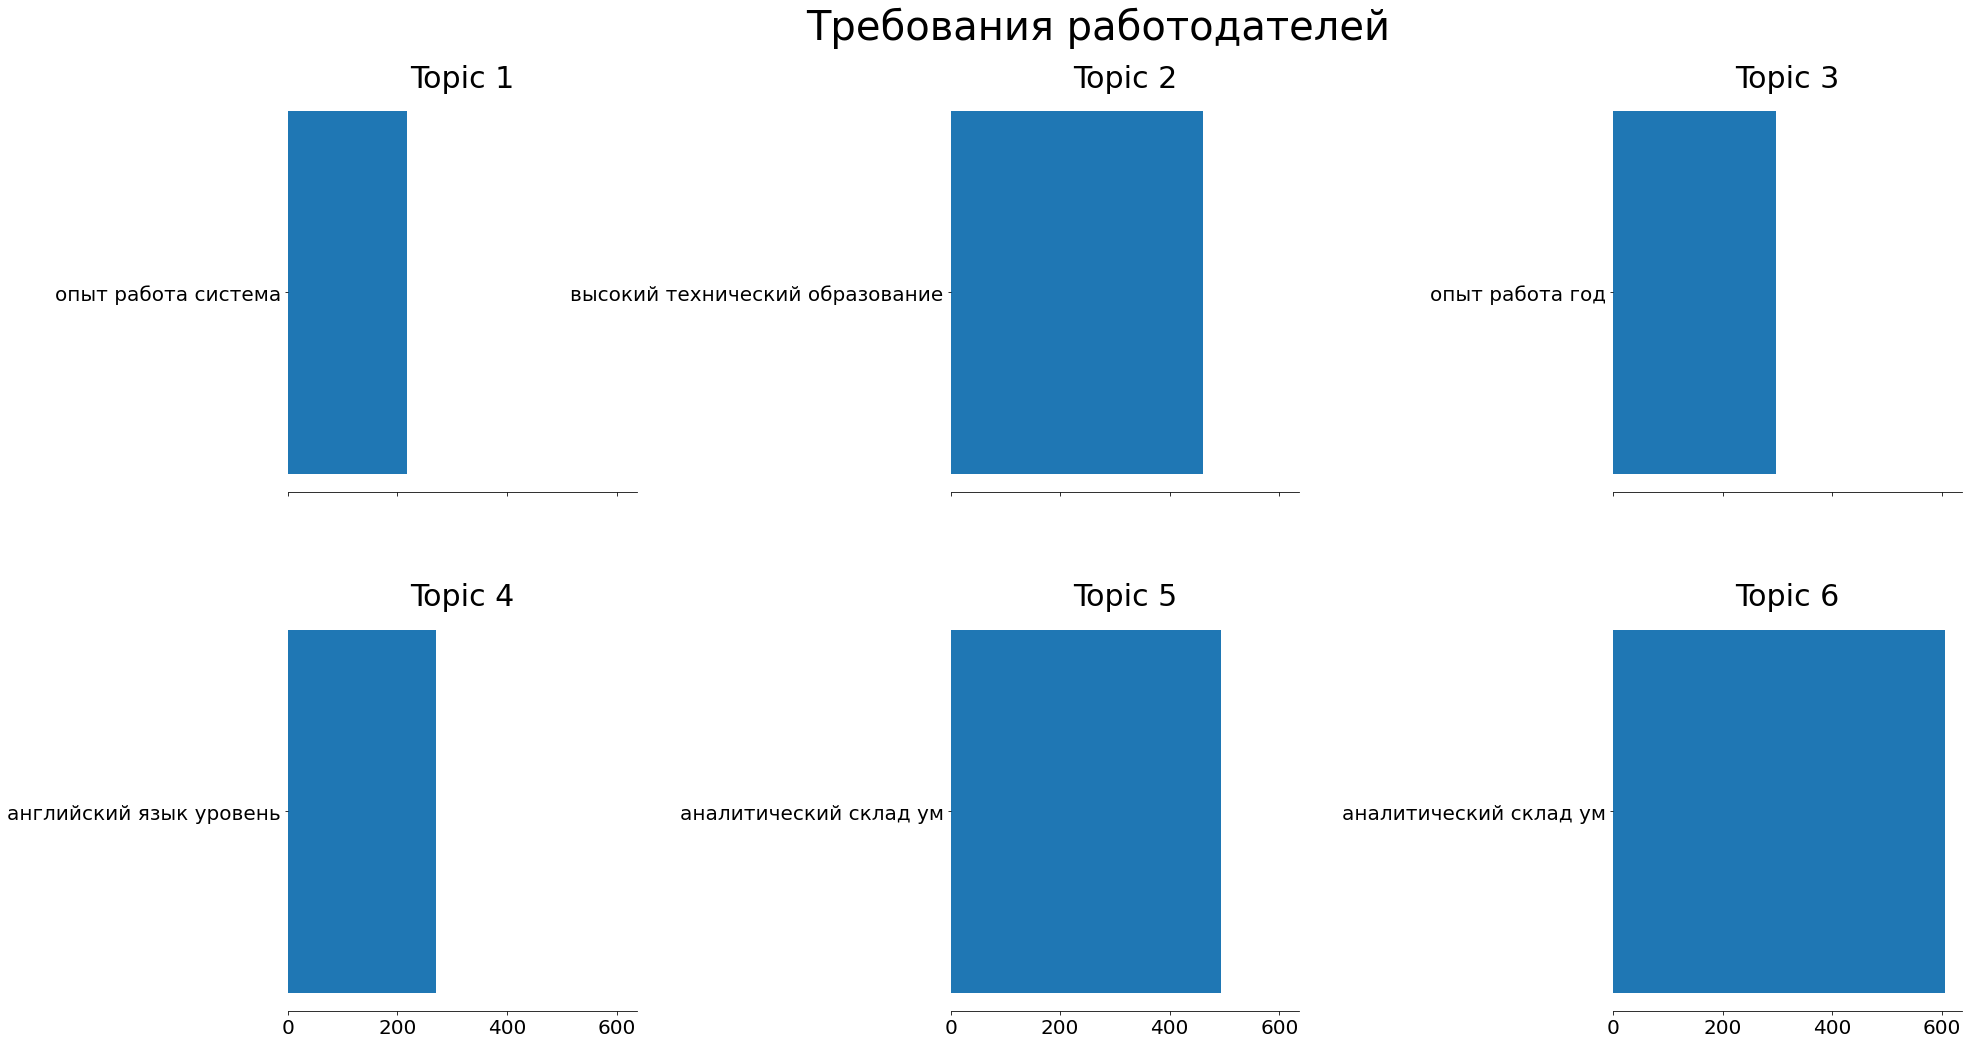

['опыт работа система',
 'высокий технический образование',
 'опыт работа год',
 'английский язык уровень',
 'аналитический склад ум',
 'аналитический склад ум']

In [104]:
terms = vectorizer.get_feature_names()
n_top_words = 1

plot_top_words(lda, terms, n_top_words, 'Требования работодателей')

In [105]:
# ----------------------

# Для АНАЛИТИКОВ найдем ТРЕБОВАНИЯ

*    от работодателя

In [106]:
df_it_analitics = df_it.loc[df_it._prof_roles_id == 10]
df_it_analitics.shape

(4883, 29)

In [107]:
# отбираем по номеру id-профессии '_prof_roles_id' и опыту 'experience'
df_require_txt = df_it_analitics.copy()
print(df_require_txt.shape)

(4883, 29)


In [108]:
#  ВОСПОЛЬЗУЕМСЯ ТЕМАТИЧЕСКИМ МОДЕЛИРОВАНИЕМ для вычисления наиболее часто встречающихся требований работодателя (в вакансиях)
# Необходимые импорты и подгрузки
import pandas as pd # Библиотека для работы с таблицами
import nltk # Библиотека для работы с текстами
from nltk.tokenize import word_tokenize, sent_tokenize # токенайзер - разбивает непрерывный текст на токены(слова)
from nltk.stem.snowball import SnowballStemmer # стеммер - преобразует тексты к начальной форме
from nltk.corpus import stopwords # список незначимых слов - я, ты, он, она, там и тд

import pymorphy2
from pymorphy2 import MorphAnalyzer

import string
morph_analyzer = pymorphy2.MorphAnalyzer() # Создаем объект стеммера
ru_stop_words = stopwords.words('russian')  # Подгружаем список стоп слов из модуля stopwords библиотеки nltk 
ru_stop_words = ru_stop_words + ['готовность', 'работать', 'час', 'неделя', '40', '30']

punctuations = list(string.punctuation)
punctuations.extend(['•', '—', '–', '«', '»', "'", '``', '“', '”', '.', '’', '·', '●'])


# готовность работать 40

In [109]:
def text_processing(text, morph_analyzer, stop_words, punct):
    """принимает на вход предложение и возвращает леммы токенов предложения, фильтруя по стоп словам и удаляя знаки пунктуации"""
    words = word_tokenize(text.lower()) # С помощью токенизации разбиваем текст на токены 
    words = [word for word in words if word not in stop_words] # Удаляем стопслова
    words = [word for word in words if word not in punct] # Удаляем знаки пунктуации
    words = [morph_analyzer.parse(word)[0].normalized.word for word in words] # лемматизируем каждое слово
    words = ' '.join(words)

    return words

# генерируем колонку lemmatized_text
df_require_txt['require_lemmatized'] = df_require_txt['_require'].apply(lambda x: text_processing(x, morph_analyzer, ru_stop_words, punctuations)) # с помощью метода apply прогоняем значения колонки text через нашу функцию обработки text_processing
df_require_txt.head()

,_id,area,area_id,description,employer,employment,experience,industry,key_skills,name,...,_special_id,_special_name,_percent_special,region_id,region_name,_key_skills_list,_responsib,_require,_conditions,require_lemmatized
8,48332928,Барнаул,11,"<p><strong>GBC TEAM</strong>, является эксперт...",ДЖИ БИ СИ ТИМ,Полная занятость,От 1 года до 3 лет,"[""Информационные технологии, системная интегра...","[{""name"":""Atlassian Confluence""},{""name"":""CRM""...",Консультант CRM,...,12.92 1.113 1.273 1.82 1.536 1.25,"Информационные технологии Консалтинг, Аутсорси...",1.0,1217,Алтайский край,"Atlassian Confluence,CRM,SQL,MS SQL,Terrasoft ...",проведение интервью с участниками процесса в...,опыт работы с crm-системами от двух лет; опы...,"интересные задачи, участие в различных крупн...",опыт работа crm-система два год опыт понимание...
77,45627783,Барнаул,11,<p>Приглашаем системного аналитика в команду Г...,"ХОСТ, Группа компаний",Полная занятость,От 3 до 6 лет,NaN,"[{""name"":""Nan""}]",Системный аналитик,...,1.395 1.221 1.272 1.327 1.25,"Банковское ПО Программирование, Разработка Сис...",1.0,1217,Алтайский край,Nan,"собирать требования, анализировать бизнес-п...",Nan,"возможность работать удаленно, либо в террит...",nan
265,49530130,Барнаул,11,<p><strong>МТС – одна из крупнейших российских...,МТС,Полная занятость,От 1 года до 3 лет,NaN,"[{""name"":""Nan""}]",Аналитик,...,1.295 1.25,Телекоммуникации Аналитик,1.0,1217,Алтайский край,Nan,проводить анализ причин изменения фактически...,Nan,фиксированная часть 38150 (до вычета налога)...,nan
318,49850996,Барнаул,11,<p><em><strong>«Татспиртпром» - крупнейшая фед...,Татспиртпром,Полная занятость,От 1 года до 3 лет,"[""Продукты питания""]","[{""name"":""MS PowerPoint""},{""name"":""Грамотная р...",Аналитик отдела продаж,...,1.221 1.272 1.50 1.327 1.25,"Программирование, Разработка Системная интегра...",1.0,1217,Алтайский край,"MS PowerPoint,Грамотная речь,Документооборот,Р...","обработка, проверка и консолидация отчетов; ...",: опыт работы от 1 года в должности: координа...,работа в устойчивой ко всем изменениям компа...,опыт работа 1 год должность координатор отдел ...
326,49201762,Барнаул,11,<p><strong>Сибагро</strong> - крупный агропром...,Головное подразделение Сибагро,Полная занятость,От 1 года до 3 лет,NaN,"[{""name"":""1С: Управление Производственным Пред...",Системный аналитик,...,1.221 1.50 1.327 1.25,"Программирование, Разработка Системы управлени...",1.0,1217,Алтайский край,"1С: Управление Производственным Предприятием,П...",- анализ и систематизация бизнес-процессов; -...,Nan,Nan,nan


In [110]:
df_require_txt

,_id,area,area_id,description,employer,employment,experience,industry,key_skills,name,...,_special_id,_special_name,_percent_special,region_id,region_name,_key_skills_list,_responsib,_require,_conditions,require_lemmatized
8,48332928,Барнаул,11,"<p><strong>GBC TEAM</strong>, является эксперт...",ДЖИ БИ СИ ТИМ,Полная занятость,От 1 года до 3 лет,"[""Информационные технологии, системная интегра...","[{""name"":""Atlassian Confluence""},{""name"":""CRM""...",Консультант CRM,...,12.92 1.113 1.273 1.82 1.536 1.25,"Информационные технологии Консалтинг, Аутсорси...",1.0,1217,Алтайский край,"Atlassian Confluence,CRM,SQL,MS SQL,Terrasoft ...",проведение интервью с участниками процесса в...,опыт работы с crm-системами от двух лет; опы...,"интересные задачи, участие в различных крупн...",опыт работа crm-система два год опыт понимание...
77,45627783,Барнаул,11,<p>Приглашаем системного аналитика в команду Г...,"ХОСТ, Группа компаний",Полная занятость,От 3 до 6 лет,NaN,"[{""name"":""Nan""}]",Системный аналитик,...,1.395 1.221 1.272 1.327 1.25,"Банковское ПО Программирование, Разработка Сис...",1.0,1217,Алтайский край,Nan,"собирать требования, анализировать бизнес-п...",Nan,"возможность работать удаленно, либо в террит...",nan
265,49530130,Барнаул,11,<p><strong>МТС – одна из крупнейших российских...,МТС,Полная занятость,От 1 года до 3 лет,NaN,"[{""name"":""Nan""}]",Аналитик,...,1.295 1.25,Телекоммуникации Аналитик,1.0,1217,Алтайский край,Nan,проводить анализ причин изменения фактически...,Nan,фиксированная часть 38150 (до вычета налога)...,nan
318,49850996,Барнаул,11,<p><em><strong>«Татспиртпром» - крупнейшая фед...,Татспиртпром,Полная занятость,От 1 года до 3 лет,"[""Продукты питания""]","[{""name"":""MS PowerPoint""},{""name"":""Грамотная р...",Аналитик отдела продаж,...,1.221 1.272 1.50 1.327 1.25,"Программирование, Разработка Системная интегра...",1.0,1217,Алтайский край,"MS PowerPoint,Грамотная речь,Документооборот,Р...","обработка, проверка и консолидация отчетов; ...",: опыт работы от 1 года в должности: координа...,работа в устойчивой ко всем изменениям компа...,опыт работа 1 год должность координатор отдел ...
326,49201762,Барнаул,11,<p><strong>Сибагро</strong> - крупный агропром...,Головное подразделение Сибагро,Полная занятость,От 1 года до 3 лет,NaN,"[{""name"":""1С: Управление Производственным Пред...",Системный аналитик,...,1.221 1.50 1.327 1.25,"Программирование, Разработка Системы управлени...",1.0,1217,Алтайский край,"1С: Управление Производственным Предприятием,П...",- анализ и систематизация бизнес-процессов; -...,Nan,Nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41318,49753474,Рязань,77,<p><strong>МТС – </strong>одна из крупнейших р...,МТС,Полная занятость,Нет опыта,NaN,"[{""name"":""MS PowerPoint""},{""name"":""SQL""},{""nam...",Аналитик,...,15.237 15.388 15.730 1.117 1.327 1.25,"Производство, Технологии Административный перс...",0.5,1704,Рязанская область,"MS PowerPoint,SQL,Английский язык,Аналитическо...",собирать и анализировать статистику основных...,Nan,Nan,nan
41347,48320010,Москва,1,<p><strong>Кто мы и что мы делаем?</strong><br...,Ozon,Стажировка,Нет опыта,NaN,"[{""name"":""IT""},{""name"":""JavaScript""},{""name"":""...",Стажёр-аналитик (Базовые сервисы и инструменты...,...,1.172 1.221 15.93,"Начальный уровень, Мало опыта Программирование...",1.0,1,Москва,"IT,JavaScript,RUM,Navigation Timing API,Lighth...","создавать новые дашборды в grafana, поддержи...",желание развиваться и учиться (ты постоянно ...,Nan,желание развиваться учиться постоянно быть узн...
41353,49264809,Москва,1,<p>Мы ищем сотрудника в команду международного...,Boxberry,Полная занятость,От 1 года до 3 лет,NaN,"[{""name"":""Nan""}]",Аналитик данных,...,5.27 2.179 2.342 2.425 1.25,"Аналитик Начальный уровень, Мало опыта Финансо...",0.4,1,Москва,Nan,расчет бизнес-кейсов для подключения новых к...,"высшее образование (математическое, экономич...",Nan,высокий образование математический экономическ...


In [111]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import numpy as np
import nltk
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
import multiprocessing
from sklearn.decomposition import LatentDirichletAllocation

import matplotlib.pyplot as plt

In [112]:
texts = df_require_txt['require_lemmatized'] # TfidfVectorizer
vectorizer = CountVectorizer(ngram_range=(3,3)) # min_df=3  CountVectorizer -  сколько слов откидываем если их меньше
term_document_matrix = vectorizer.fit_transform(texts)

In [113]:
texts

8        опыт работа crm-система два год опыт понимание...
77                                                     nan
265                                                    nan
318      опыт работа 1 год должность координатор отдел ...
326                                                    nan
                               ...                        
41318                                                  nan
41347    желание развиваться учиться постоянно быть узн...
41353    высокий образование математический экономическ...
41357    знакомство it-сфера хороший владение excel pow...
41365                                                  nan
Name: require_lemmatized, Length: 4883, dtype: object

In [114]:
lda = LatentDirichletAllocation(n_components=6, # 
                 max_iter=10,
                 learning_method='batch',
                 verbose=2)

lda.fit(term_document_matrix)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 1 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 2 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 3 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 4 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 5 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 6 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 7 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 8 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 9 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


iteration: 10 of max_iter: 10


LatentDirichletAllocation(n_components=6, verbose=2)

In [115]:
pd.DataFrame(lda.transform(term_document_matrix))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


,0,1,2,3,4,5
0,0.007588,0.007585,0.007587,0.007586,0.962070,0.007584
1,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
2,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
3,0.010438,0.010453,0.947784,0.010439,0.010441,0.010445
4,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
...,...,...,...,...,...,...
4878,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
4879,0.005056,0.005051,0.974736,0.005051,0.005052,0.005054
4880,0.042157,0.041713,0.041779,0.790741,0.041778,0.041832
4881,0.005378,0.005380,0.005384,0.973102,0.005378,0.005379


In [116]:
df_require_txt['lda_topic'] = lda.transform(term_document_matrix).argmax(axis = 1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [117]:
df_require_txt['lda_topic'].value_counts()

0    2275
5     551
2     521
1     521
3     512
4     503
Name: lda_topic, dtype: int64

In [118]:
# функция для отрисовки тематик и ключевых слов, входящих в нее

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    list_top = []
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        list_top = list_top + top_features
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    return list_top

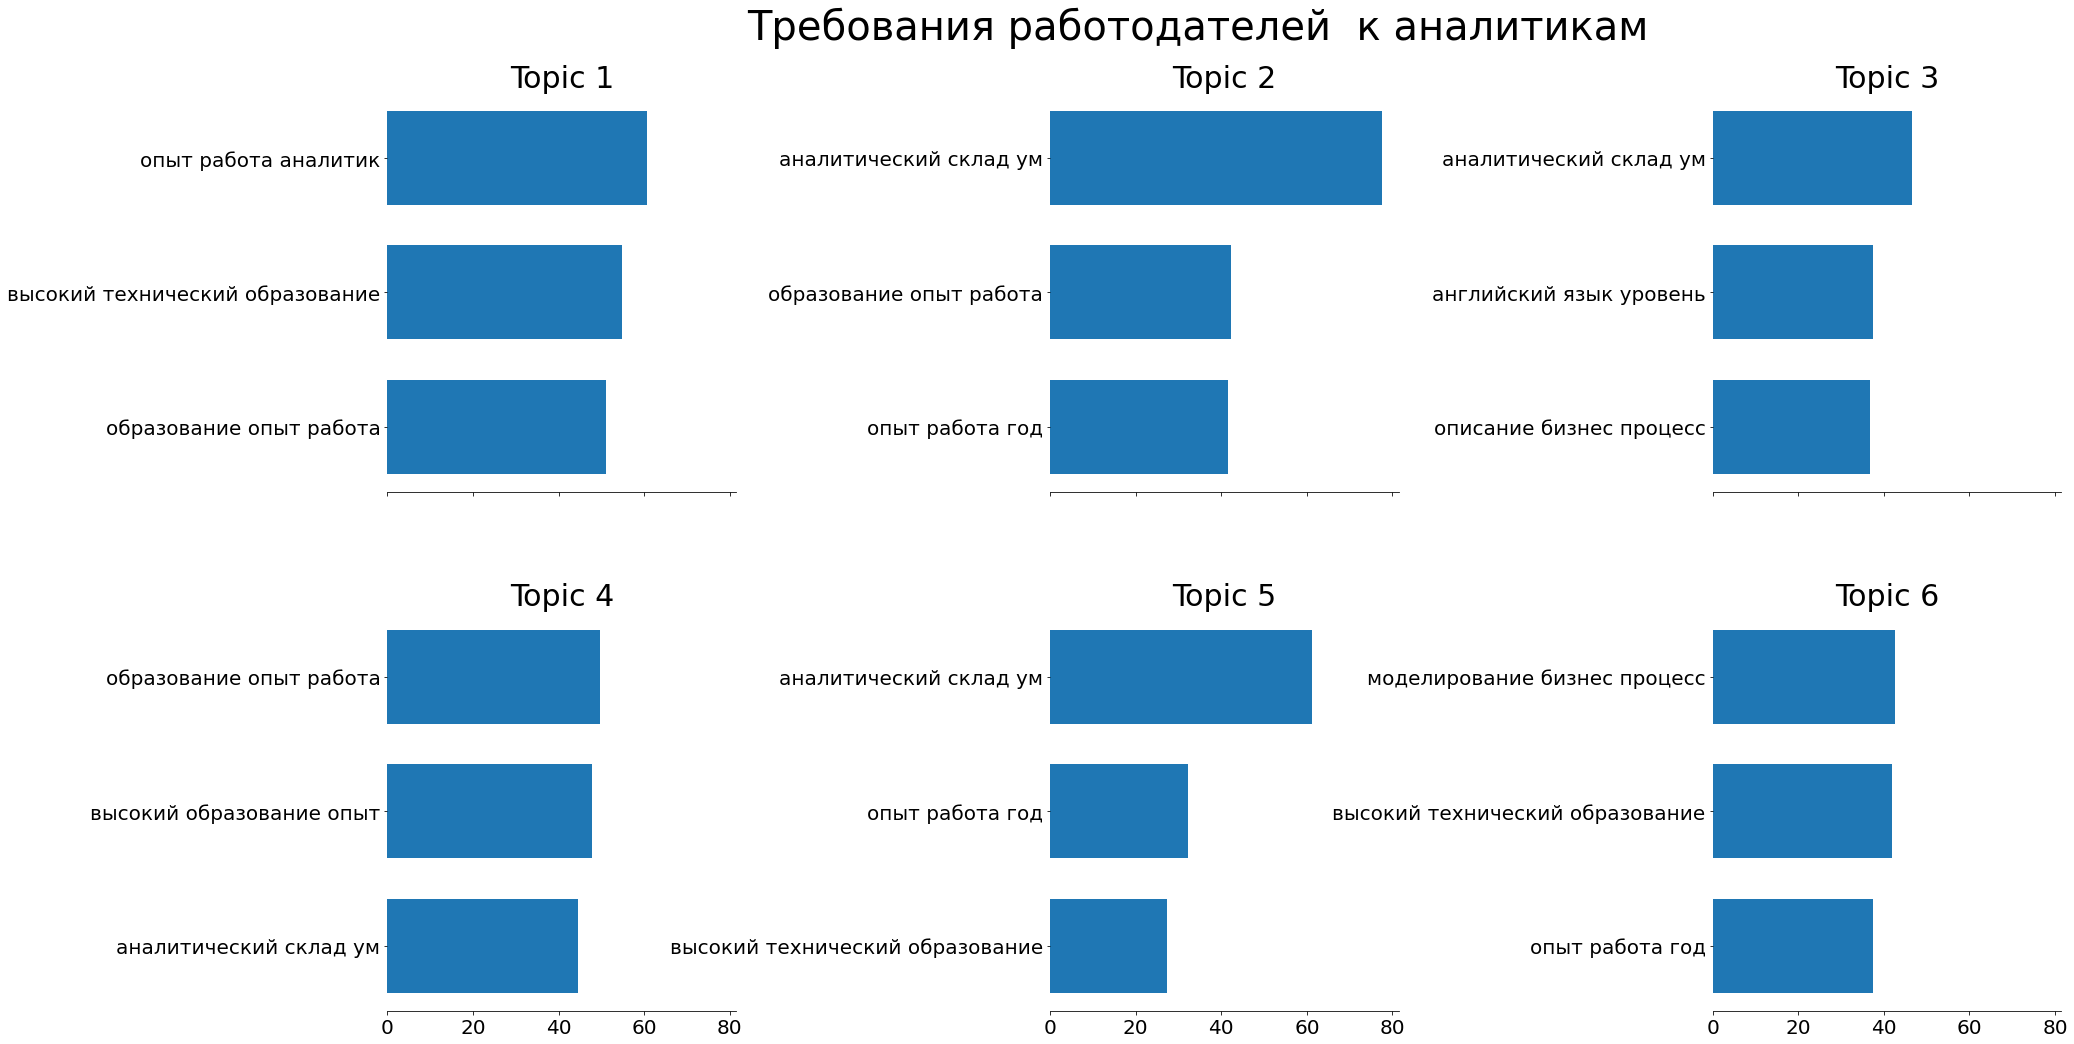

['опыт работа аналитик',
 'высокий технический образование',
 'образование опыт работа',
 'аналитический склад ум',
 'образование опыт работа',
 'опыт работа год',
 'аналитический склад ум',
 'английский язык уровень',
 'описание бизнес процесс',
 'образование опыт работа',
 'высокий образование опыт',
 'аналитический склад ум',
 'аналитический склад ум',
 'опыт работа год',
 'высокий технический образование',
 'моделирование бизнес процесс',
 'высокий технический образование',
 'опыт работа год']

In [119]:
terms = vectorizer.get_feature_names()
n_top_words = 3

plot_top_words(lda, terms, n_top_words, 'Требования работодателей  к аналитикам')

# Для общего пула IT-профессий найдем УСЛОВИЯ ТРУДА

*    от работодателя

In [120]:
df_it.shape

(41367, 29)

In [121]:
# отбираем по номеру id-профессии '_prof_roles_id' и опыту 'experience'
df_conditions_txt = df_it.copy()
print(df_conditions_txt.shape)

(41367, 29)


In [122]:
#  ВОСПОЛЬЗУЕМСЯ ТЕМАТИЧЕСКИМ МОДЕЛИРОВАНИЕМ для вычисления наиболее часто встречающихся требований работодателя (в вакансиях)
# Необходимые импорты и подгрузки
import pandas as pd # Библиотека для работы с таблицами
import nltk # Библиотека для работы с текстами
from nltk.tokenize import word_tokenize, sent_tokenize # токенайзер - разбивает непрерывный текст на токены(слова)
from nltk.stem.snowball import SnowballStemmer # стеммер - преобразует тексты к начальной форме
from nltk.corpus import stopwords # список незначимых слов - я, ты, он, она, там и тд
import string
morph_analyzer = pymorphy2.MorphAnalyzer() # Создаем объект стеммера
ru_stop_words = stopwords.words('russian')  # Подгружаем список стоп слов из модуля stopwords библиотеки nltk 
ru_stop_words = ru_stop_words + ['готовность', 'работать', 'час', 'неделя', '40', '30']

punctuations = list(string.punctuation)
punctuations.extend(['•', '—', '–', '«', '»', "'", '``', '“', '”', '.', '’', '·', '●'])


# готовность работать 40

In [123]:
def text_processing(text, morph_analyzer, stop_words, punct):
    """принимает на вход предложение и возвращает леммы токенов предложения, фильтруя по стоп словам и удаляя знаки пунктуации"""
    words = word_tokenize(text.lower()) # С помощью токенизации разбиваем текст на токены 
    words = [word for word in words if word not in stop_words] # Удаляем стопслова
    words = [word for word in words if word not in punct] # Удаляем знаки пунктуации
    words = [morph_analyzer.parse(word)[0].normalized.word for word in words] # лемматизируем каждое слово
    words = ' '.join(words)

    return words

# генерируем колонку lemmatized_text
df_conditions_txt['conditions_lemmatized'] = df_conditions_txt['_conditions'].apply(lambda x: text_processing(x, morph_analyzer, ru_stop_words, punctuations)) # с помощью метода apply прогоняем значения колонки text через нашу функцию обработки text_processing
df_conditions_txt.head()

,_id,area,area_id,description,employer,employment,experience,industry,key_skills,name,...,_special_id,_special_name,_percent_special,region_id,region_name,_key_skills_list,_responsib,_require,_conditions,conditions_lemmatized
0,49133800,Рубцовск,1226,<strong>Обязанности:</strong> <ul> <li>Админис...,Глобал Логистик,Полная занятость,Нет опыта,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""1С: Предприятие 8""},{""name"":""1С прог...",Начинающий программист 1С,...,1.221,"Программирование, Разработка",1.0,1217,Алтайский край,"1С: Предприятие 8,1С программирование",администрирование пользовательских учетных з...,профильное образование (высшее или незаконче...,официальное трудоустройство и белая заработ...,официальный трудоустройство белый заработный п...
1,44460274,Рубцовск,1226,<strong>Обязанности:</strong> <ul> <li> <p>Обе...,Глобал Логистик,Полная занятость,От 1 года до 3 лет,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""1С: Зарплата и управление персоналом...",Программист 1С,...,1.221,"Программирование, Разработка",1.0,1217,Алтайский край,"1С: Зарплата и управление персоналом,1С: Бухга...",обеспечение необходимой поддержки пользоват...,опыт программирования 1с: предприятие от 2-...,заработная плата без задержек. удобный офис ...,заработный плата задержка удобный офис находит...
2,49111123,Рубцовск,1226,<strong>Обязанности:</strong> <ul> <li>Обеспеч...,Глобал Логистик,Полная занятость,Нет опыта,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""Настройка ПК""},{""name"":""Настройка ПО...",Специалист по информационным технологиям,...,1.221 1.273 1.82 1.211,"Программирование, Разработка Системный админис...",1.0,1217,Алтайский край,"Настройка ПК,Настройка ПО,Пользователь ПК,Сбор...",обеспечение бесперебойной работы компьютерно...,профильное образование (высшее или незаконче...,официальное трудоустройство и белая заработ...,официальный трудоустройство белый заработный п...
3,49894148,Барнаул,11,<strong>Обязанности:</strong> <ul> <li>Работа ...,Гранат,Полная занятость,От 1 года до 3 лет,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""1С программирование""},{""name"":""1С: П...",Программист 1С8,...,1.221 1.50 1.82 1.9 1.10,"Программирование, Разработка Системы управлени...",1.0,1217,Алтайский край,"1С программирование,1С: Предприятие 8,1С: Зарп...",работа по техническим заданиям; разработка н...,: практический опыт работы в должности програ...,рабочей день 5/2 с 08.00 до 17.00 отсутствие...,рабочий день 5/2 08.00 17.00 отсутствие задерж...
4,49873900,Барнаул,11,<p><em>Сегодня Группа «ПАРФЮМ» — это националь...,Группа компаний Парфюм,Полная занятость,От 1 года до 3 лет,"[""Перевозки, логистика, склад, ВЭД"",""Товары на...","[{""name"":""1С программирование""},{""name"":""1С: У...",Программист 1 С/Разработчик,...,1.221,"Программирование, Разработка",1.0,1217,Алтайский край,"1С программирование,1С: Управление Торговлей,1...","сопровождение, доработка и оптимизация обмен...",опыт разработки решений на платформе 1с 8.2/...,официальное трудоустройство согласно тк рф; ...,официальный трудоустройство согласно тк рф раб...


In [124]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import numpy as np
import nltk
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
import multiprocessing
from sklearn.decomposition import LatentDirichletAllocation

import matplotlib.pyplot as plt

In [125]:
texts = df_conditions_txt['conditions_lemmatized'] # TfidfVectorizer
vectorizer = CountVectorizer(ngram_range=(3,3)) # min_df=3  CountVectorizer -  сколько слов откидываем если их меньше
term_document_matrix = vectorizer.fit_transform(texts)

In [126]:
texts

0        официальный трудоустройство белый заработный п...
1        заработный плата задержка удобный офис находит...
2        официальный трудоустройство белый заработный п...
3        рабочий день 5/2 08.00 17.00 отсутствие задерж...
4        официальный трудоустройство согласно тк рф раб...
                               ...                        
41362    динамичный быстроразвивающийся бизнес ресурс в...
41363    оформление тк рф график работа 5/2 уютный офис...
41364    динамичный быстроразвивающийся бизнес возможно...
41365                                                     
41366    работа стабильный компания федеральный уровень...
Name: conditions_lemmatized, Length: 41367, dtype: object

In [127]:
vectorizer   

CountVectorizer(ngram_range=(3, 3))

In [128]:
lda = LatentDirichletAllocation(n_components=6, # 
                 max_iter=10,
                 learning_method='batch',
                 verbose=2)

lda.fit(term_document_matrix)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 1 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 2 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 3 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 4 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 5 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 6 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 7 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 8 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 9 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 10 of max_iter: 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s finished


LatentDirichletAllocation(n_components=6, verbose=2)

In [129]:
pd.DataFrame(lda.transform(term_document_matrix))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s finished


,0,1,2,3,4,5
0,0.986919,0.002610,0.002611,0.002628,0.002614,0.002618
1,0.011136,0.686938,0.011143,0.011198,0.268438,0.011146
2,0.986919,0.002610,0.002611,0.002628,0.002614,0.002618
3,0.011209,0.011117,0.011295,0.165613,0.011130,0.789635
4,0.852735,0.008361,0.008435,0.113677,0.008417,0.008374
...,...,...,...,...,...,...
41362,0.006174,0.969129,0.006174,0.006173,0.006175,0.006175
41363,0.987142,0.002568,0.002573,0.002570,0.002573,0.002574
41364,0.006411,0.967941,0.006411,0.006411,0.006413,0.006412
41365,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667


In [151]:
df_require_txt['lda_topic'] = lda.transform(term_document_matrix).argmax(axis = 1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s finished


ValueError: Length of values (41367) does not match length of index (4883)

In [131]:
df_require_txt['lda_topic'].value_counts()

0    2275
5     551
2     521
1     521
3     512
4     503
Name: lda_topic, dtype: int64

In [132]:
df_require_txt.loc[df_require_txt['lda_topic'] == 0]

,_id,area,area_id,description,employer,employment,experience,industry,key_skills,name,...,_special_name,_percent_special,region_id,region_name,_key_skills_list,_responsib,_require,_conditions,require_lemmatized,lda_topic
77,45627783,Барнаул,11,<p>Приглашаем системного аналитика в команду Г...,"ХОСТ, Группа компаний",Полная занятость,От 3 до 6 лет,NaN,"[{""name"":""Nan""}]",Системный аналитик,...,"Банковское ПО Программирование, Разработка Сис...",1.0,1217,Алтайский край,Nan,"собирать требования, анализировать бизнес-п...",Nan,"возможность работать удаленно, либо в террит...",nan,0
265,49530130,Барнаул,11,<p><strong>МТС – одна из крупнейших российских...,МТС,Полная занятость,От 1 года до 3 лет,NaN,"[{""name"":""Nan""}]",Аналитик,...,Телекоммуникации Аналитик,1.0,1217,Алтайский край,Nan,проводить анализ причин изменения фактически...,Nan,фиксированная часть 38150 (до вычета налога)...,nan,0
326,49201762,Барнаул,11,<p><strong>Сибагро</strong> - крупный агропром...,Головное подразделение Сибагро,Полная занятость,От 1 года до 3 лет,NaN,"[{""name"":""1С: Управление Производственным Пред...",Системный аналитик,...,"Программирование, Разработка Системы управлени...",1.0,1217,Алтайский край,"1С: Управление Производственным Предприятием,П...",- анализ и систематизация бизнес-процессов; -...,Nan,Nan,nan,0
350,46691415,Барнаул,11,<p><strong>Что делать :</strong></p> <ul> <li>...,Крупнейший дистрибьютор продуктов питания в Ал...,Полная занятость,Нет опыта,"[""Продукты питания"",""Розничная торговля""]","[{""name"":""MS PowerPoint""},{""name"":""Работа с ба...",Аналитик отдела продаж,...,"Телекоммуникации, Сетевые решения Аналитик Ана...",1.0,1217,Алтайский край,"MS PowerPoint,Работа с базами данных,Многозада...",работа в базе 1с: формирование отчетов обраб...,Nan,график работы 5/2 возможность карьерного рос...,nan,0
373,44315597,Барнаул,11,<p><strong>LIBERTEX — является ведущим междуна...,LIBERTEX,Полная занятость,От 1 года до 3 лет,"[""Образовательные учреждения"",""Финансовый сект...","[{""name"":""Функциональное тестирование""},{""name...",Software tester ( в проект работы с платежами),...,Банковское ПО Игровое ПО Тестирование,1.0,1217,Алтайский край,"Функциональное тестирование,Проведение тестиро...",анализ требований по проекту; составление...,Nan,,nan,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41109,48557739,Рязань,77,<p><strong>Обязанности:</strong></p> <ul> <li>...,Тинькофф,Полная занятость,От 1 года до 3 лет,NaN,"[{""name"":""BPMN""},{""name"":""SQL""},{""name"":""Бизне...",Системный аналитик,...,"Программирование, Разработка Системная интегра...",1.0,1704,Рязанская область,"BPMN,SQL,Бизнес-анализ,Linux,Agile Project Man...",сбор и анализ бизнес-требований по разработк...,"знания основ sql, опыт проектирования бд; хо...","белая заработная плата, размер которой обсуж...",знание основа sql опыт проектирование бд хорош...,0
41120,49867678,Рязань,77,<p> </p> <p><strong>EGAR Technology</strong> -...,"EGAR TECHNOLOGY, INC.",Полная занятость,От 1 года до 3 лет,"[""Информационные технологии, системная интегра...","[{""name"":""XML""},{""name"":""Atlassian Confluence""...",Системный аналитик (банковская сфера),...,"Банковское ПО Программирование, Разработка Сис...",1.0,1704,Рязанская область,"XML,Atlassian Confluence,Atlassian Jira,SQL,Си...",Nan,Nan,официальное оформление в стабильную и динами...,nan,0
41163,49500389,Рязань,77,<p><em>Компания ООО ИК «СИБИНТЕК» оказывает ус...,ИК СИБИНТЕК,Полная занятость,От 1 года до 3 лет,"[""Информационные технологии, системная интегра...","[{""name"":""Nan""}]",Бизнес- аналитик,...,Аналитик,1.0,1704,Рязанская область,Nan,"сбор, формализация и согласование требований...",высшее техническое/экономическое образовани...,оформление по тк рф в штат компании; конк...,высокий техническое/экономический образование ...,0
41318,49753474,Рязань,77,<p><strong>МТС – </strong>одна из крупнейших р...,МТС,Полная занятость,Нет опыта,NaN,"[{""name"":""MS PowerPoint""},{""nam

In [133]:
# функция для отрисовки тематик и ключевых слов, входящих в нее

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    list_top = []
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        list_top = list_top + top_features
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    return list_top

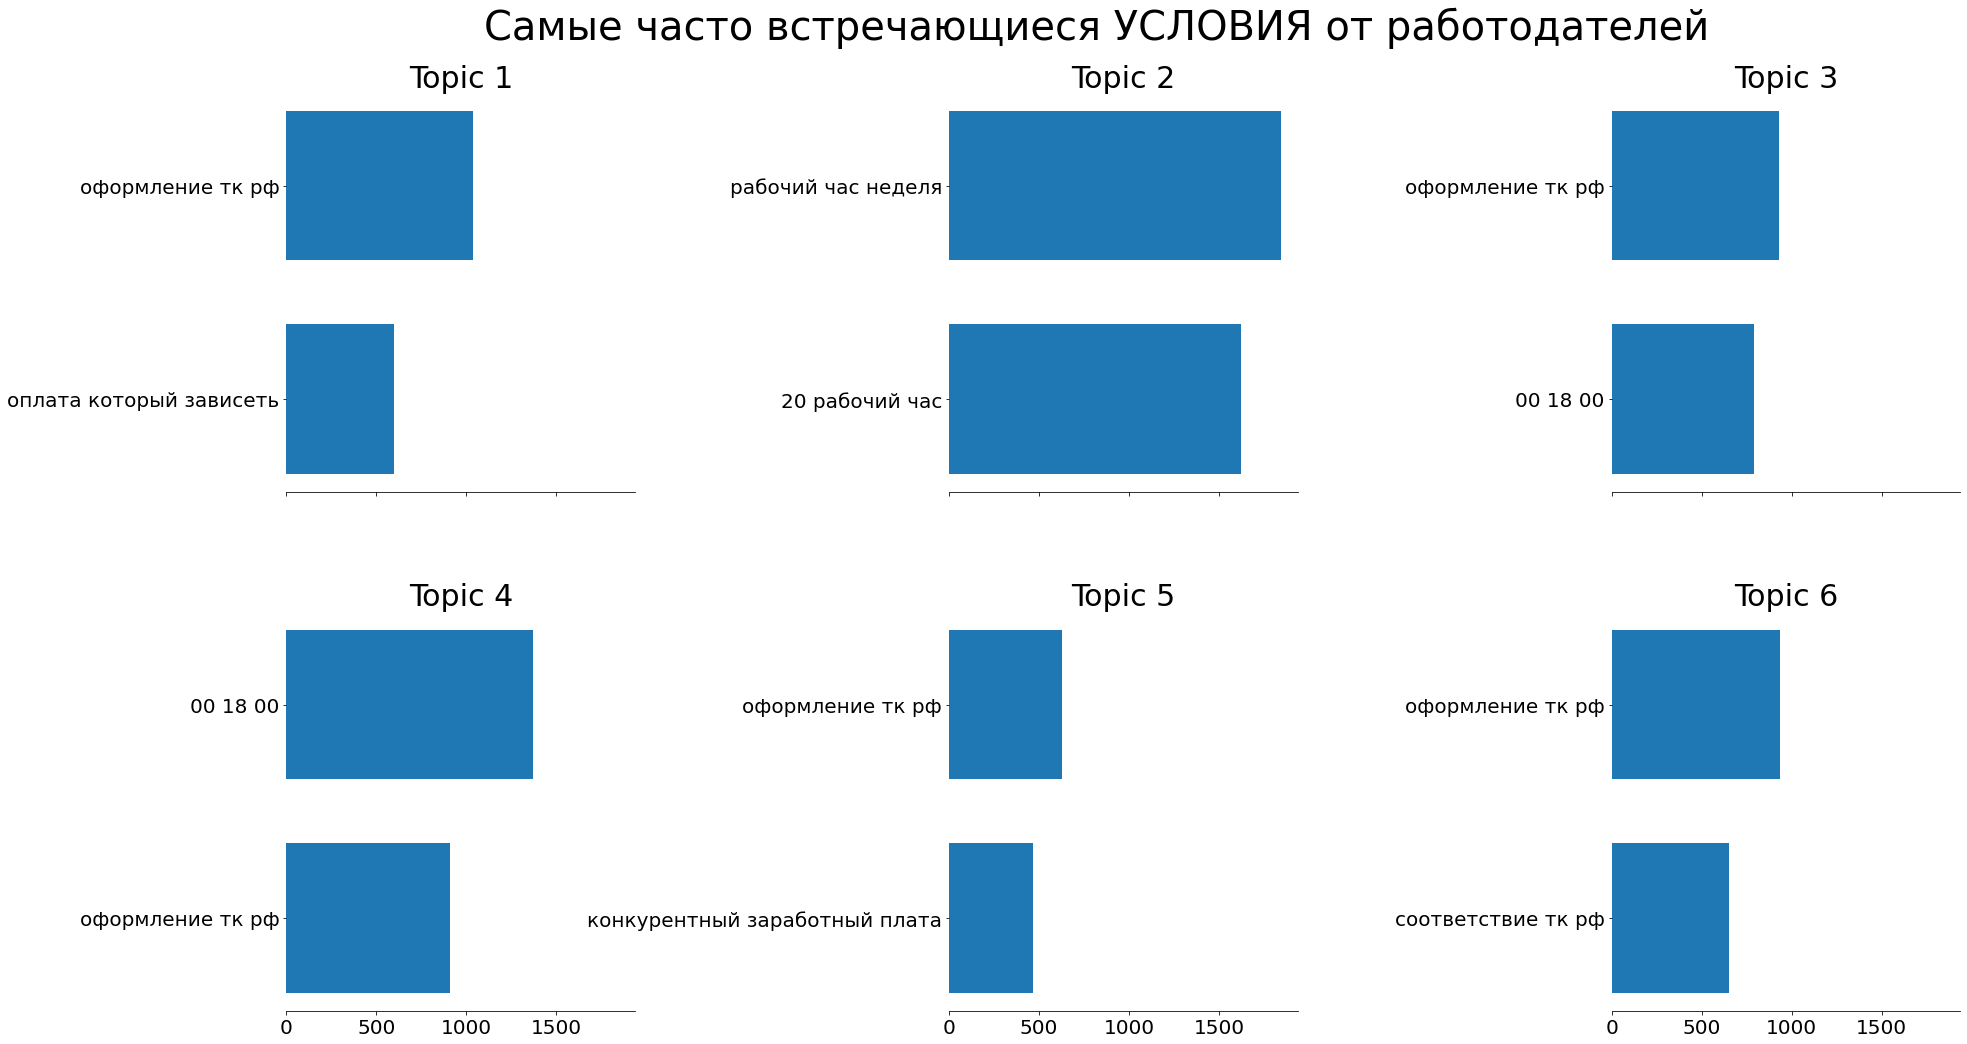

['оформление тк рф',
 'оплата который зависеть',
 'рабочий час неделя',
 '20 рабочий час',
 'оформление тк рф',
 '00 18 00',
 '00 18 00',
 'оформление тк рф',
 'оформление тк рф',
 'конкурентный заработный плата',
 'оформление тк рф',
 'соответствие тк рф']

In [134]:
terms = vectorizer.get_feature_names()
n_top_words = 2

plot_top_words(lda, terms, n_top_words, 'Самые часто встречающиеся УСЛОВИЯ от работодателей')

In [138]:
df_analitics = df_it.loc[df_it._prof_roles_id == 96]
df_analitics.head(5)

,_id,area,area_id,description,employer,employment,experience,industry,key_skills,name,...,_prof_roles_name,_special_id,_special_name,_percent_special,region_id,region_name,_key_skills_list,_responsib,_require,_conditions
0,49133800,Рубцовск,1226,<strong>Обязанности:</strong> <ul> <li>Админис...,Глобал Логистик,Полная занятость,Нет опыта,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""1С: Предприятие 8""},{""name"":""1С прог...",Начинающий программист 1С,...,"Программист, разработчик",1.221,"Программирование, Разработка",1.0,1217,Алтайский край,"1С: Предприятие 8,1С программирование",администрирование пользовательских учетных з...,профильное образование (высшее или незаконче...,официальное трудоустройство и белая заработ...
1,44460274,Рубцовск,1226,<strong>Обязанности:</strong> <ul> <li> <p>Обе...,Глобал Логистик,Полная занятость,От 1 года до 3 лет,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""1С: Зарплата и управление персоналом...",Программист 1С,...,"Программист, разработчик",1.221,"Программирование, Разработка",1.0,1217,Алтайский край,"1С: Зарплата и управление персоналом,1С: Бухга...",обеспечение необходимой поддержки пользоват...,опыт программирования 1с: предприятие от 2-...,заработная плата без задержек. удобный офис ...
3,49894148,Барнаул,11,<strong>Обязанности:</strong> <ul> <li>Работа ...,Гранат,Полная занятость,От 1 года до 3 лет,"[""Перевозки, логистика, склад, ВЭД""]","[{""name"":""1С программирование""},{""name"":""1С: П...",Программист 1С8,...,"Программист, разработчик",1.221 1.50 1.82 1.9 1.10,"Программирование, Разработка Системы управлени...",1.0,1217,Алтайский край,"1С программирование,1С: Предприятие 8,1С: Зарп...",работа по техническим заданиям; разработка н...,: практический опыт работы в должности програ...,рабочей день 5/2 с 08.00 до 17.00 отсутствие...
4,49873900,Барнаул,11,<p><em>Сегодня Группа «ПАРФЮМ» — это националь...,Группа компаний Парфюм,Полная занятость,От 1 года до 3 лет,"[""Перевозки, логистика, склад, ВЭД"",""Товары на...","[{""name"":""1С программирование""},{""name"":""1С: У...",Программист 1 С/Разработчик,...,"Программист, разработчик",1.221,"Программирование, Разработка",1.0,1217,Алтайский край,"1С программирование,1С: Управление Торговлей,1...","сопровождение, доработка и оптимизация обмен...",опыт разработки решений на платформе 1с 8.2/...,официальное трудоустройство согласно тк рф; ...
7,40633586,Барнаул,11,<p>Мы ищем в свою дружную команду программиста...,EKS,Полная занятость,От 1 года до 3 лет,"[""Гостиницы, рестораны, общепит, кейтеринг"",""П...","[{""name"":""1С программирование""},{""name"":""1С: У...",Программист 1C,...,"Программист, разработчик",1.221 1.272 1.50 1.82 1.536,"Программирование, Разработка Системная интегра...",1.0,1217,Алтайский край,"1С программирование,1С: Управление Производств...",: - участие во внедрении и дальнейшей поддержк...,"- знание 1с, знание настроек бухгалтерского и...",график работы 5/2 работа в стабильной компан...


In [139]:
df_analitics.columns


Index(['_id', 'area', 'area_id', 'description', 'employer', 'employment',
       'experience', 'industry', 'key_skills', 'name', 'professional_roles',
       'salary_currency', 'salary_max', 'salary_min', 'schedule',
       'specializations', 'vacancies_url', '_IT', '_prof_roles_id',
       '_prof_roles_name', '_special_id', '_special_name', '_percent_special',
       'region_id', 'region_name', '_key_skills_list', '_responsib',
       '_require', '_conditions'],
      dtype='object')

In [140]:
reg = ['1679', '2019', '1202', '1624', '2', '1']

for i in reg:
    sal_min_mean = round(df_analitics.loc[(df_analitics.region_id == i)].salary_min.mean(),2)
    print(f'Средняя мин. зп для АНАЛИТИКА в регионе {i} составляет {sal_min_mean}')

Средняя мин. зп для АНАЛИТИКА в регионе 1679 составляет 109905.8
Средняя мин. зп для АНАЛИТИКА в регионе 2019 составляет 123005.32
Средняя мин. зп для АНАЛИТИКА в регионе 1202 составляет 116184.93
Средняя мин. зп для АНАЛИТИКА в регионе 1624 составляет 103380.61
Средняя мин. зп для АНАЛИТИКА в регионе 2 составляет 112471.85
Средняя мин. зп для АНАЛИТИКА в регионе 1 составляет 142015.51


In [141]:
df_it.shape

(41367, 29)

In [142]:
df_it.to_csv('df_it.csv')

In [143]:
df_it_сге = df_it.copy()

In [144]:
df_it_сге.drop(['description','vacancies_url','_key_skills_list', '_responsib', '_require', '_conditions', 'key_skills','professional_roles',
                'specializations', 'salary_currency'], axis=1, inplace=True)


In [145]:
df_it_сге.to_csv('df_it_сге.csv')

In [146]:
df_it_сге.shape

(41367, 19)

In [147]:
df_it_сге.salary_max.median()

100000.0

In [148]:
df_it_сге.loc[df_it_сге.salary_min.isna(), 'salary_min'] = df_it_сге.salary_min.median()

In [149]:
df_it_сге.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41367 entries, 0 to 41366
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               41367 non-null  int64  
 1   area              41367 non-null  object 
 2   area_id           41367 non-null  int64  
 3   employer          41367 non-null  object 
 4   employment        41367 non-null  object 
 5   experience        41367 non-null  object 
 6   industry          26858 non-null  object 
 7   name              41367 non-null  object 
 8   salary_max        8282 non-null   float64
 9   salary_min        41367 non-null  float64
 10  schedule          41367 non-null  object 
 11  _IT               41367 non-null  bool   
 12  _prof_roles_id    41367 non-null  int64  
 13  _prof_roles_name  41367 non-null  object 
 14  _special_id       41367 non-null  object 
 15  _special_name     41367 non-null  object 
 16  _percent_special  41367 non-null  float6